# Predicting Video Lecture Characteristics Using Machine Learning

This project applies machine learning techniques to analyze and predict characteristics of video lectures using structured metadata, transcript features, and video-derived data. The project demonstrates the full pipeline of a supervised learning workflow, from exploratory data analysis and model development to evaluation and theoretical justification of regression algorithms.

---

## Project Overview

The goal of this project is to build and evaluate machine learning models capable of predicting key features of educational video content. The dataset used includes transcripts, metadata, and derived statistics for a collection of online video lectures.

The project was divided into three major components:

1. **Exploratory Data Analysis (EDA) and Preprocessing**  
   - Assessed data distributions, missing values, and feature relevance  
   - Applied appropriate scaling, encoding, and feature engineering steps  
   - Visualized correlations and prepared the dataset for modeling

2. **Model Training and Evaluation**  
   - Built and tuned a regression model (e.g., linear regression, decision tree, or ensemble-based method)  
   - Evaluated model performance using appropriate metrics such as RMSE, MAE, and R²  
   - Compared results across different algorithms and hyperparameters

3. **Theoretical Derivation of Regression Algorithm**  
   - Derived the mathematical formulation of a linear regression model from first principles  
   - Explained the cost function, gradient descent updates, and convergence conditions  
   - Connected the theoretical basis with practical implementation in code

---

## Dataset

The dataset includes a CSV file (`lectures_dataset.csv`) containing:
- **Transcript features** (e.g., word counts, readability scores)
- **Video metadata** (e.g., duration, speaker ID, topic classification)
- **Labels or targets** derived from student engagement metrics or lecture characteristics

All preprocessing and feature extraction was performed programmatically using Python, with clear documentation and reproducibility.

---

## Technologies Used

- **Programming Language**: Python  
- **Libraries**: NumPy, Pandas, Scikit-learn, Matplotlib, Seaborn  
- **Concepts**: Supervised Learning, Linear Regression, Gradient Descent, Evaluation Metrics  
- **Tools**: Jupyter Notebook, LaTeX (for mathematical derivations)

---

## Key Outcomes

- Built a complete end-to-end regression pipeline to predict educational video characteristics
- Justified preprocessing and modeling decisions with both empirical analysis and theoretical foundations
- Developed a deeper understanding of how machine learning models relate to their mathematical underpinnings
- Ensured reproducibility and clarity through well-documented code and explanations

---

## Use Case

This project demonstrates the ability to apply classical machine learning techniques to structured datasets with mixed feature types. It highlights critical skills such as:
- Feature engineering and preprocessing
- Model selection and tuning
- Statistical and mathematical reasoning


## Video Lectures Dataset

This coursework works with a collection of video lectures. Different characteristics identified from the meta data, video data and transcripts of the lectures are included in the `lectures_dataset.csv` dataset.

In [1]:
!rm -rf .git  # Remove any existing git configuration.
!git init
!git remote add origin https://github.com/dionferns/Foundations-of-Artificial-Intelligence-COMP0186.git
!git config core.sparseCheckout true
!echo "COMP0186_CW1" > .git/info/sparse-checkout
!git pull origin main

# # !mv Foundations-of-Artificial-Intelligence-COMP0186/COMP0186_CW1 ./COMP0186_CW1
# !rm -rf COMP0186_CW1

# Move all files from the folder to the current directory (content)
!mv COMP0186_CW1/* ./  # Move only the files inside the folder
!rm -rf COMP0186_CW1   # Remove the original folder
!ls

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 44 (delta 16), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (44/44), 1.27 MiB | 3.91 MiB/s, done.
From https://github.com/dionferns/Foundations-of-Artificial-Intelligence-COMP0186
 * branch            main       -> FETCH_HEAD
 * [new branch]      main       -> origin/main
assignment_COMP0186.i

In [2]:
import pandas as pd
import numpy as np

data_path = "lectures_dataset.csv"
lectures = pd.read_csv(data_path)

In [3]:
lectures.head(10)

,auxiliary_rate,conjugate_rate,normalization_rate,tobe_verb_rate,preposition_rate,pronoun_rate,document_entropy,easiness,fraction_stopword_coverage,fraction_stopword_presence,...,title_word_count,word_count,most_covered_topic,topic_coverage,duration,lecture_type,has_parts,speaker_speed,silent_period_rate,median_engagement
0,0.013323,0.033309,0.034049,0.035159,0.121392,0.089563,7.753995,75.583936,0.428135,0.553664,...,9,2668,http://en.wikipedia.org/wiki/Kernel_density_es...,0.414578,890,vl,False,2.997753,0.000000,0.502923
1,0.014363,0.030668,0.018763,0.036749,0.095885,0.103002,8.305269,86.870523,0.602446,0.584498,...,6,7512,http://en.wikipedia.org/wiki/Interest_rate,0.292437,2850,vl,False,2.635789,0.000000,0.011989
2,0.019028,0.033242,0.030720,0.037827,0.118294,0.124255,7.965583,81.915968,0.525994,0.605685,...,3,4264,http://en.wikipedia.org/wiki/Normal_distribution,0.271424,1680,vit,False,2.538095,0.000000,0.041627
3,0.023416,0.042700,0.016873,0.046832,0.122590,0.104339,8.142877,80.148937,0.504587,0.593664,...,9,2869,http://en.wikipedia.org/wiki/Matrix_(mathematics),0.308092,1270,vl,False,2.259055,0.000000,0.064989
4,0.021173,0.041531,0.023412,0.038884,0.130700,0.102606,8.161250,76.907549,0.559633,0.581637,...,9,4840,http://en.wikipedia.org/wiki/Transport,0.414219,2000,vkn,False,2.420000,0.000000,0.052154
5,0.017616,0.036921,0.023649,0.043195,0.137307,0.098938,8.182952,76.684133,0.522936,0.575290,...,10,4108,http://en.wikipedia.org/wiki/Time,0.338298,1830,vl,False,2.244809,0.000000,0.256300
6,0.011080,0.039036,0.018423,0.042257,0.111698,0.112342,8.101635,85.303173,0.596330,0.600232,...,10,7523,http://en.wikipedia.org/wiki/Phase_diagram,0.438675,3060,vl,False,2.458497,0.196126,0.032233
7,0.026247,0.038064,0.008956,0.038313,0.098644,0.163951,7.733064,97.572190,0.584098,0.687275,...,9,7790,http://en.wikipedia.org/wiki/Rank_(linear_alge...,0.212774,3910,vl,False,1.992327,0.289208,0.015063
8,0.021587,0.033706,0.018557,0.041091,0.099792,0.123840,8.219794,87.008975,0.541284,0.600454,...,7,5112,http://en.wikipedia.org/wiki/Machine_learning,0.298585,2980,vl,False,1.715436,0.000000,0.025882
9,0.023666,0.052065,0.018933,0.027539,0.131239,0.108434,7.714182,88.650478,0.437309,0.617900,...,10,2299,http://en.wikipedia.org/wiki/Photon,0.300573,1040,vl,False,2.210577,0.000000,0.031795


In [4]:
print(lectures.columns)

Index(['auxiliary_rate', 'conjugate_rate', 'normalization_rate',
       'tobe_verb_rate', 'preposition_rate', 'pronoun_rate',
       'document_entropy', 'easiness', 'fraction_stopword_coverage',
       'fraction_stopword_presence', 'subject_domain', 'freshness',
       'title_word_count', 'word_count', 'most_covered_topic',
       'topic_coverage', 'duration', 'lecture_type', 'has_parts',
       'speaker_speed', 'silent_period_rate', 'median_engagement'],
      dtype='object')


- The dataset contains 11,548 observations 21 potential features and 1 label column. The label we are aiming to predict is `median_engagement` which can take a value between 0 and 1 where values close to 0 exhibit low engagement and values close to 1 indicate high engagement.  

### Description of Columns

The following table describes the columns in the dataset.

|      **Variable Name**     |     **Type**     |
|:--------------------------:|:----------------:|
| auxiliary_rate             | Fraction of auxiliary verbs in the transcript |
| conjugate_rate             | Fraction of conjugates in the transcript |
| normalization_rate         | Fraction of normalisation suffixes used in the transcript |
| tobe_verb_rate             | Fraction of to-be-verbs in the transcript |
| preposition_rate           | Fraction of prepositions in the transcript |
| pronoun_rate               | Fraction of pronouns words in the transcript |
| document_entropy           | Document entropy computed using word counts (Topic coherence) |
| easiness                   | The reading level of the transcript (level of English) |
| fraction_stopword_coverage | Fraction of unique stopwords used in the transcript |
| fraction_stopword_presence | Fraction of stopwords in the transcript |
| subject_domain             | If the subject belongs to STEM or not. |
| freshness                  | How recently the video published |
| title_word_count           | Number of words in the title |
| word_count                 | Number of words in the transcript |
| most_covered_topic         | The Wikipedia URL of the most covered topic |
| topic_coverage             | To what degree is the most covered topic covered |
| duration                   | Duration of the video |
| lecture_type               | Type of lecture (e.g. lecture, tutorial, debate, discussion etc.) |
| has_parts                  | If the lecture is broken into multiple videos |
| speaker_speed              | The word rate of the speaker (words per minute) |
| silent_period_rate         | Fraction of Silence in the transcript where words are not spoken |
| median_engagement          | Median % of video watched by all the viewers who watched it |

# Part 1: Exploratory Data Analysis and Feature Extraction 
This section attempts to understand the dataset before we jump into building a machine learning model.

##  Different data types each variable in the dataset
There are different data types different variables fall into. Based on these data types, we may handle these variables differently. 


|      **Variable Name**     |     **Type**     |
|:--------------------------:|:----------------:|
| auxiliary_rate             | **Continuous** |
| conjugate_rate             | **Continuous** |
| normalization_rate         | **Continuous** |
| tobe_verb_rate             | **Continuous** |
| preposition_rate           | **Continuous** |
| pronoun_rate               | **Continuous** |
| document_entropy           | **Continuous** |
| easiness                   | **Continuous** |
| fraction_stopword_coverage | **Continuous** |
| fraction_stopword_presence | **Continuous** |
| subject_domain             | **Categorical** |
| freshness                  | **Continuous** |
| title_word_count           | **Discrete** |
| word_count                 | **Discrete** |
| most_covered_topic         | **Categorical** |
| topic_coverage             | **Continuous** |
| duration                   | **Continous** |
| lecture_type               | **Categorical** |
| has_parts                  | **Categorical** |
| speaker_speed              | **Continuous** |
| silent_period_rate         | **Continuous** |
| median_engagement          | **Continuous** |

## Analyse the variables to understand them.
 `Exploratory data analysis` is carried out on the dataset to understand the data and the value distributions better. This enables us to carry out specific pre-processing steps.

#### Choice of Analyses to be carried out with justification
NOTE: THE JUSTIFICATION FOR EACH ANALYSIS IS GIVEN RIGTH BEFORE THE ANALYSIS IS CARRIED OUT(I.E ABOVE THE CODE OF IMPLEMENTATION FOR EACH ANALYSIS)
1. **Analysing Data types of each feature**
2. **Calculating missing values of each feature**
3. **Calculating number of zero values in each feature**
3. **Continuous data distribuiton for median engagement above and below 0.5**
5. **Correlation matrix**
6. **Check for Outliers in the Dataset.**
7. **Continuous data probability distribution**
8. **Number of unique values in categorical features.**
9. **Visualising the Distribution of Categorical features using Pie charts.**
10. **Analysis of Missing and False Values in has_parts with Impact on median_engagement**


### General Data Analysis

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Data types of each feature.

**JUSTIFICATION**

It is important to sepearte out the categorical and numberical features, since these two data types require different types of encoding. Also, numerical features can directly be used in machine learnign features after normalisation. But categorical data needs to be transformed into numerical representation using techniques such as one-hot encoding, label encoding etc.

In [6]:
lecture_copy =lectures.copy()

In [7]:
#Listing numerical columns and categorical columns along with listing their data types.

num_col = [col for col in lecture_copy.columns if lecture_copy[col].dtypes in ['int64', 'float64']]
cat_col = [col for col in lecture_copy.columns if col not in num_col]

print(f"Numerical columns:{num_col}\n")
print(f"Categorical columns: {cat_col}\n")
print(f"Data types of numerical columns:\n{lecture_copy[num_col].dtypes.to_string()}\n")
print(f"Data types of categorical columns:\n{lecture_copy[cat_col].dtypes.to_string()}\n")

Numerical columns:['auxiliary_rate', 'conjugate_rate', 'normalization_rate', 'tobe_verb_rate', 'preposition_rate', 'pronoun_rate', 'document_entropy', 'easiness', 'fraction_stopword_coverage', 'fraction_stopword_presence', 'freshness', 'title_word_count', 'word_count', 'topic_coverage', 'duration', 'speaker_speed', 'silent_period_rate', 'median_engagement']

Categorical columns: ['subject_domain', 'most_covered_topic', 'lecture_type', 'has_parts']

Data types of numerical columns:
auxiliary_rate                float64
conjugate_rate                float64
normalization_rate            float64
tobe_verb_rate                float64
preposition_rate              float64
pronoun_rate                  float64
document_entropy              float64
easiness                      float64
fraction_stopword_coverage    float64
fraction_stopword_presence    float64
freshness                       int64
title_word_count                int64
word_count                      int64
topic_coverage      

#### Missing values of each feature.

**JUSTIFICATION**

it is important to calcualte missing values, this is because missing values could possible distort the analysis which could lead to incorrect inferences. Furthermore, machine laerning models cannot handel missing data, hence by identifying them we can use correct imputation or exclusion techniques.

In [8]:
#Displaying missing values Analysis.
print("Missing values Analysis:")
print(lecture_copy.isnull().sum())              #calcualtes total number of missing values for each feature.

Missing values Analysis:
auxiliary_rate                   0
conjugate_rate                   0
normalization_rate               0
tobe_verb_rate                   0
preposition_rate                 0
pronoun_rate                     0
document_entropy                 0
easiness                         0
fraction_stopword_coverage       0
fraction_stopword_presence       0
subject_domain                5635
freshness                        0
title_word_count                 0
word_count                       0
most_covered_topic               0
topic_coverage                   0
duration                         0
lecture_type                     0
has_parts                     2152
speaker_speed                    0
silent_period_rate               0
median_engagement                0
dtype: int64


### Numerical Data Analysis

#### Caluclating number of zero values in each Fearture.

**JUSTIFICATION**

This is done because sometimes, zeros could be present to represent data points that were not calculated. Hence these cannot be treated the same as zero values which were calculated.

In [9]:
# Count numerical zeros in the column 'has_parts'
print(f"Number of Numerical Zeros")
for col in lecture_copy:
    zero_count = lecture_copy[col][(lecture_copy[col] == 0) & (lecture_copy[col].apply(lambda x: type(x) in [int, float]))].count()
    print(f"{col}: {zero_count}")

Number of Numerical Zeros
auxiliary_rate: 86
conjugate_rate: 10
normalization_rate: 113
tobe_verb_rate: 46
preposition_rate: 25
pronoun_rate: 10
document_entropy: 2
easiness: 0
fraction_stopword_coverage: 4
fraction_stopword_presence: 4
subject_domain: 0
freshness: 0
title_word_count: 0
word_count: 0
most_covered_topic: 0
topic_coverage: 4
duration: 0
lecture_type: 0
has_parts: 0
speaker_speed: 0
silent_period_rate: 4612
median_engagement: 0


#### Continuous data distribuiton for median engagement above and below 0.5.

**JUSTIFICATION**

The purpose of splitting the data into two groups based on median_engagement being above or below 0.5 and plotting their distributions is that we can identify how different features different when engagement is high versus when it is low, and helps to identify the importantce of predicting engagement. Futrthermore, it also helps to identify any underlying pattern.

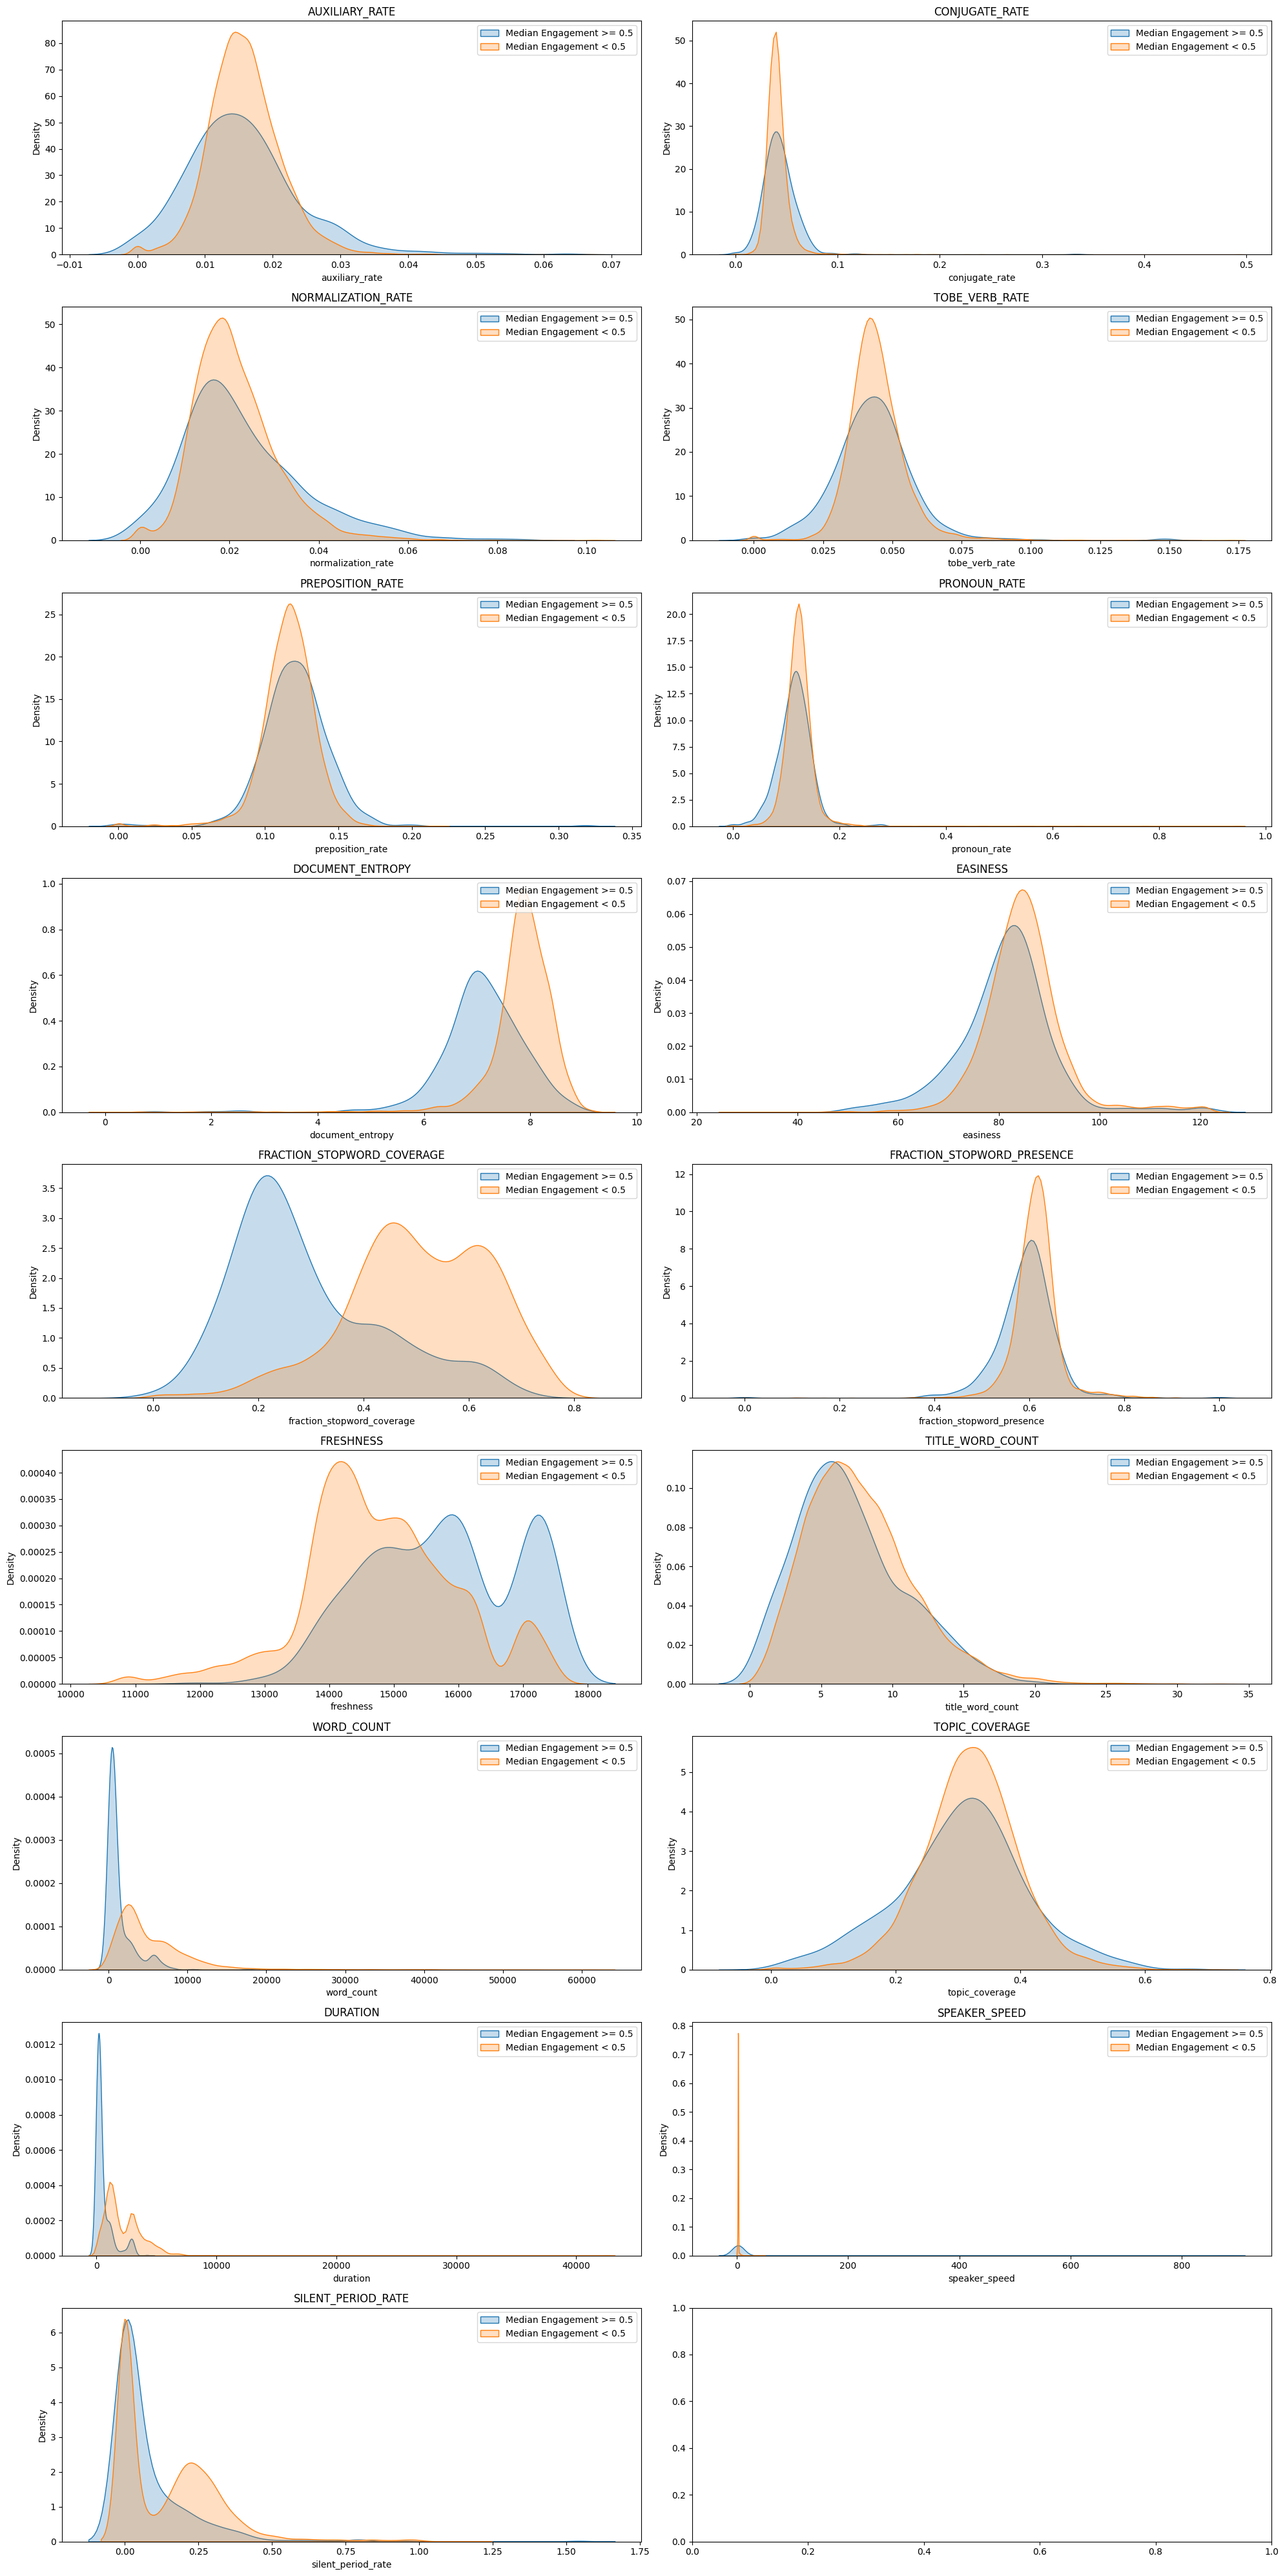

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#splitting data into two groups
group_high = lecture_copy[lecture_copy['median_engagement'] >=0.5 ]
group_low = lecture_copy[lecture_copy['median_engagement'] <0.5 ]

cont_col_no_target = [col for col in num_col if col != 'median_engagement']

fig, ax = plt.subplots(9, 2, figsize=(20,40))
for idx, x in enumerate(cont_col_no_target):
    row, coln = divmod(idx, 2)
    sns.kdeplot(data=group_high, x = x,label='Median Engagement >= 0.5', fill=True, ax=ax[row, coln])
    sns.kdeplot(data=group_low, x = x, label='Median Engagement < 0.5',  fill=True, ax=ax[row, coln])
    ax[row, coln].set_title(f"{x.upper()}")
    ax[row, coln].legend()

plt.tight_layout()
plt.show()


#### Correlation matrix

This shows the correlation matrix between the features and the target variable. this is useful for identifying any strong predictors which can help with feature selection , this also helps with cutting out irrelevant less important features(i.e features with little to no correlation can optentially be removed to simplify the model)

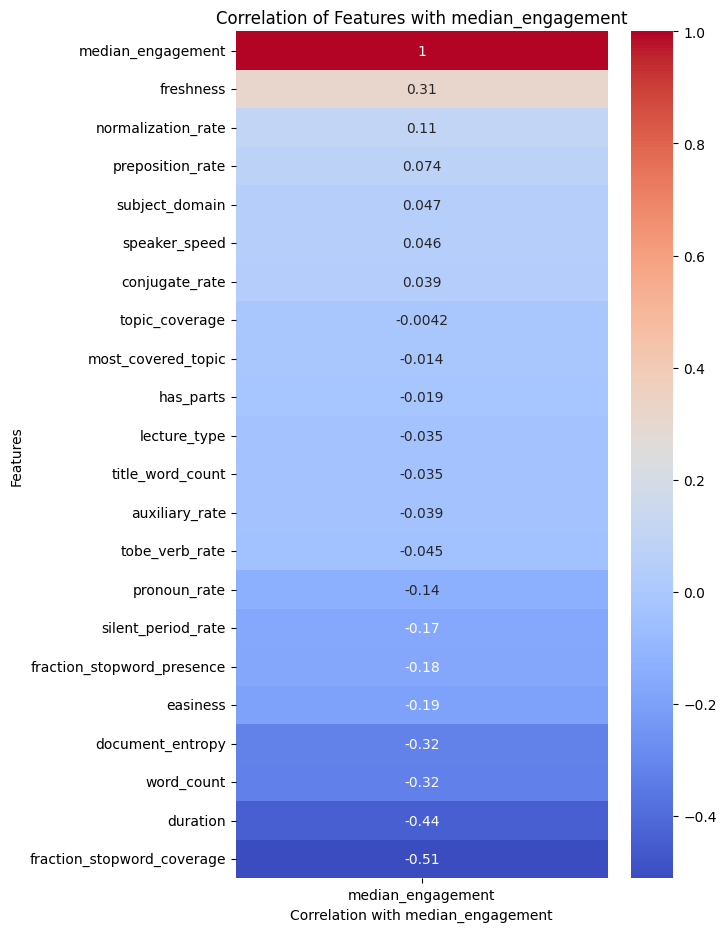

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
lecture_copy_cor = lectures.copy()

# # Convert 'object' columns to numerical representations using Label Encoding
for col in lecture_copy_cor.select_dtypes(include=['object']).columns:
    lecture_copy_cor[col] = lecture_copy_cor[col].astype('category').cat.codes

# Calculate correlation matrix for only the target variable
target_variable = 'median_engagement'  # Replace with your actual target column name
# corr_with_target = lec_df_copy1[cont_col_with_target].corr()[[target_variable]].sort_values(by=target_variable, ascending=False)
corr_with_target = lecture_copy_cor.corr()[[target_variable]].sort_values(by=target_variable, ascending=False)

# Plot correlation heatmap with only target variable on x-axis
plt.figure(figsize=(6, len(corr_with_target) / 2))  # Adjust height based on number of variables
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', cbar=True)
plt.title(f"Correlation of Features with {target_variable}")
plt.xlabel(f"Correlation with {target_variable}")
plt.ylabel("Features")
plt.show()

#Done this since the target variable is the main focus.

#### Check for Outliers in the Dataset.

The code below aims to identify the outliers in the dataset, using the interquartile range method.

This is important becasue outliers can skew the results significatntly more particularly in regression or machine learning tasks. Identifying outliers also helps to maintain data integrity as outliers can indicate errors. Also removing outliers can improve models performance.

For. this dataset, for simplicity, i have completely removed the whole row of the outlier.

In [15]:
# Store all outlier rows in a single DataFrame
all_outliers = pd.DataFrame()
num_col_out = [col for col in lecture_copy.columns if lecture_copy[col].dtype in ['int64', 'float64'] and col not in ['document_entropy', 'freshness', 'title_word_count', 'word_count', 'topic_coverage']]
num_col1 = [col for col in lecture_copy.columns if lecture_copy[col].dtype in ['int64', 'float64']]


for col in num_col_out:
    Q1 = lecture_copy[col].quantile(0.25)  # First quartile
    Q3 = lecture_copy[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range.

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"lower Bound for {col}: {lower_bound}")
    print(f"upper Bound for {col}: {upper_bound}")

    # Find outliers for this column
    col_outliers = lecture_copy[(lecture_copy[col] < lower_bound) | (lecture_copy[col] > upper_bound)]
    # col_correct = lec_df[(lec_df[col] > lower_bound) | (lec_df[col] < upper_bound)]

    print(f"{col} has {col_outliers.shape[0]} outliers")
    # Append outliers for this column to all_outliers
    # all_correct = pd.concat([all_outliers, col_correct])
    all_outliers = pd.concat([all_outliers, col_outliers])
    print()

# Drop duplicate rows (if an outlier exists in multiple columns)
all_outliers = all_outliers.drop_duplicates()
total_val = lecture_copy.size
print(f"Total number of outliers: {len(all_outliers)} out of {lecture_copy.shape[0]} values ")

lower Bound for auxiliary_rate: 0.002654109749999998
upper Bound for auxiliary_rate: 0.028560441750000002
auxiliary_rate has 334 outliers

lower Bound for conjugate_rate: 0.018809544000000008
upper Bound for conjugate_rate: 0.0606129
conjugate_rate has 474 outliers

lower Bound for normalization_rate: -0.0020220836250000006
upper Bound for normalization_rate: 0.043189215375
normalization_rate has 312 outliers

lower Bound for tobe_verb_rate: 0.021460524875
upper Bound for tobe_verb_rate: 0.065812209875
tobe_verb_rate has 479 outliers

lower Bound for preposition_rate: 0.07529245725
upper Bound for preposition_rate: 0.15824674724999999
preposition_rate has 356 outliers

lower Bound for pronoun_rate: 0.07017491937499999
upper Bound for pronoun_rate: 0.174132620375
pronoun_rate has 511 outliers

lower Bound for easiness: 68.290593035
upper Bound for easiness: 100.43796667500001
easiness has 636 outliers

lower Bound for fraction_stopword_coverage: 0.11162079599999991
upper Bound for fract

Code below outputs the size before and after the outleirs are removed from the dataset.

In [16]:
# Filter rows that are NOT in the all_outliers DataFrame

lecture_cleaned = lecture_copy[~lecture_copy.index.isin(all_outliers.index)]

# Check the size of the cleaned dataset.
print(f"Size of original data: {lecture_copy.shape}")
print(f"Size of cleaned data: {lecture_cleaned.shape}")
lecture_cleaned.to_csv('cleaned_data.csv', index=False)

Size of original data: (11548, 22)
Size of cleaned data: (8315, 22)


Code below outputs the boxblots for each feature before and after the outliers are removed from the datset.

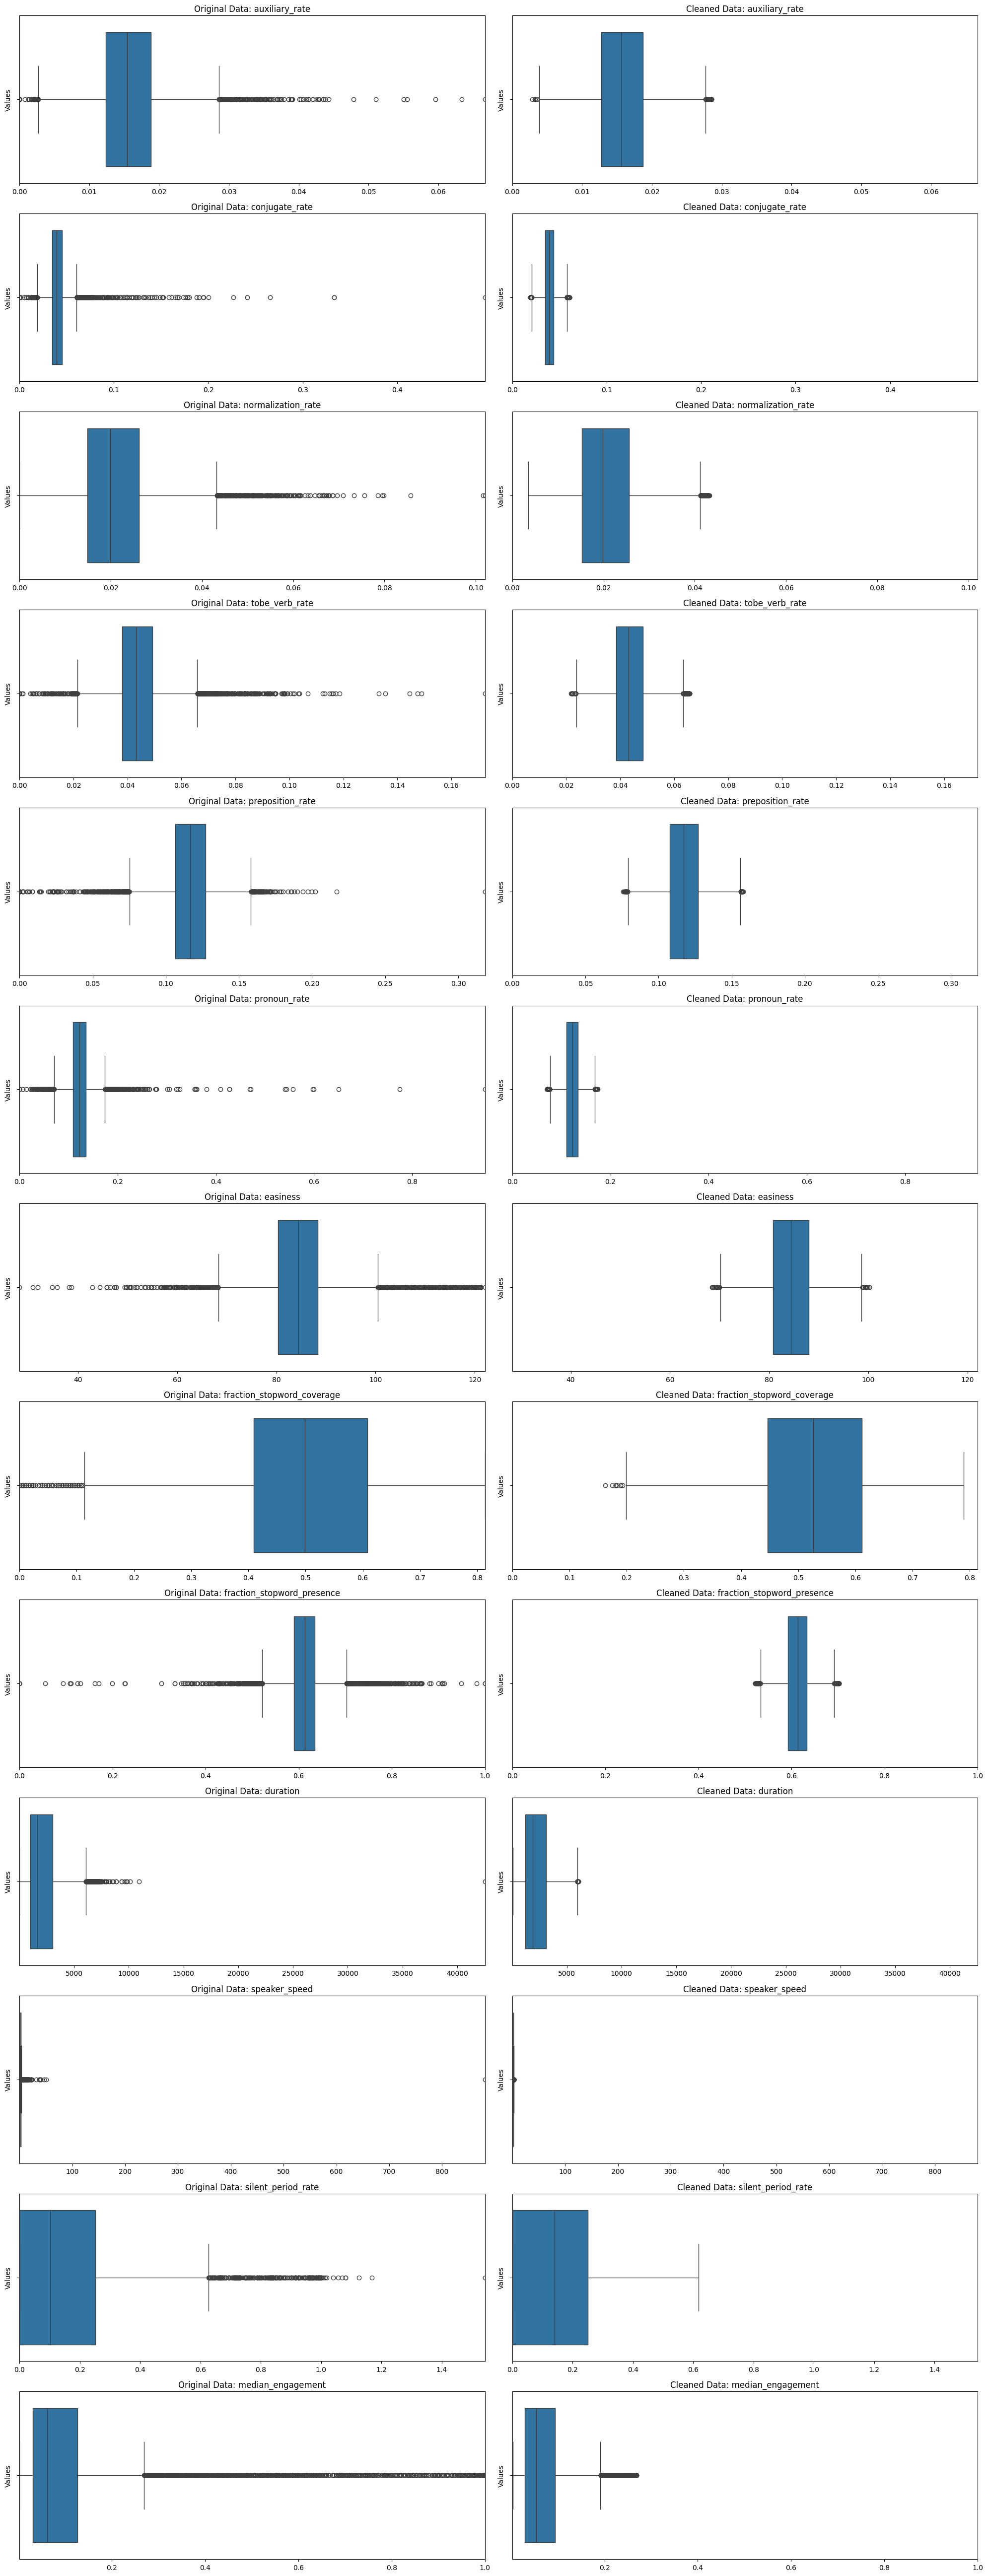

In [17]:
fig, ax = plt.subplots(len(num_col_out), 2, figsize=(20, len(num_col_out) * 4))  # Two subplots per column

for idx, col in enumerate(num_col_out):
    # Compute the range of x-values dynamically
    min_val = min(lecture_copy[col].min(), lecture_copy[col].min())
    max_val = max(lecture_copy[col].max(), lecture_copy[col].max())

    # Left: Box plot for lec_df (original data)
    sns.boxplot(data=lecture_copy, x=col, ax=ax[idx, 0])
    ax[idx, 0].set_title(f"Original Data: {col}")
    ax[idx, 0].set_ylabel("Values")
    ax[idx, 0].set_xlabel("")
    ax[idx, 0].set_xlim(min_val, max_val)  # Set x-axis range dynamically

    # Right: Box plot for lec_df_cleaned (cleaned data)
    sns.boxplot(data=lecture_cleaned, x=col, ax=ax[idx, 1])
    ax[idx, 1].set_title(f"Cleaned Data: {col}")
    ax[idx, 1].set_ylabel("Values")
    ax[idx, 1].set_xlabel("")
    ax[idx, 1].set_xlim(min_val, max_val)  # Set x-axis range dynamically

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

#### Continuous data probability distribution

**JUSTIFICATION**

Visualising the probability distribution of continuous data helps to identigy the range, spread and skewness of the variables. this helps to observe how the data is distributed and becomes easier to spot patters, clusters or anomalies etc. Furthermore, it helps to detect skewness.


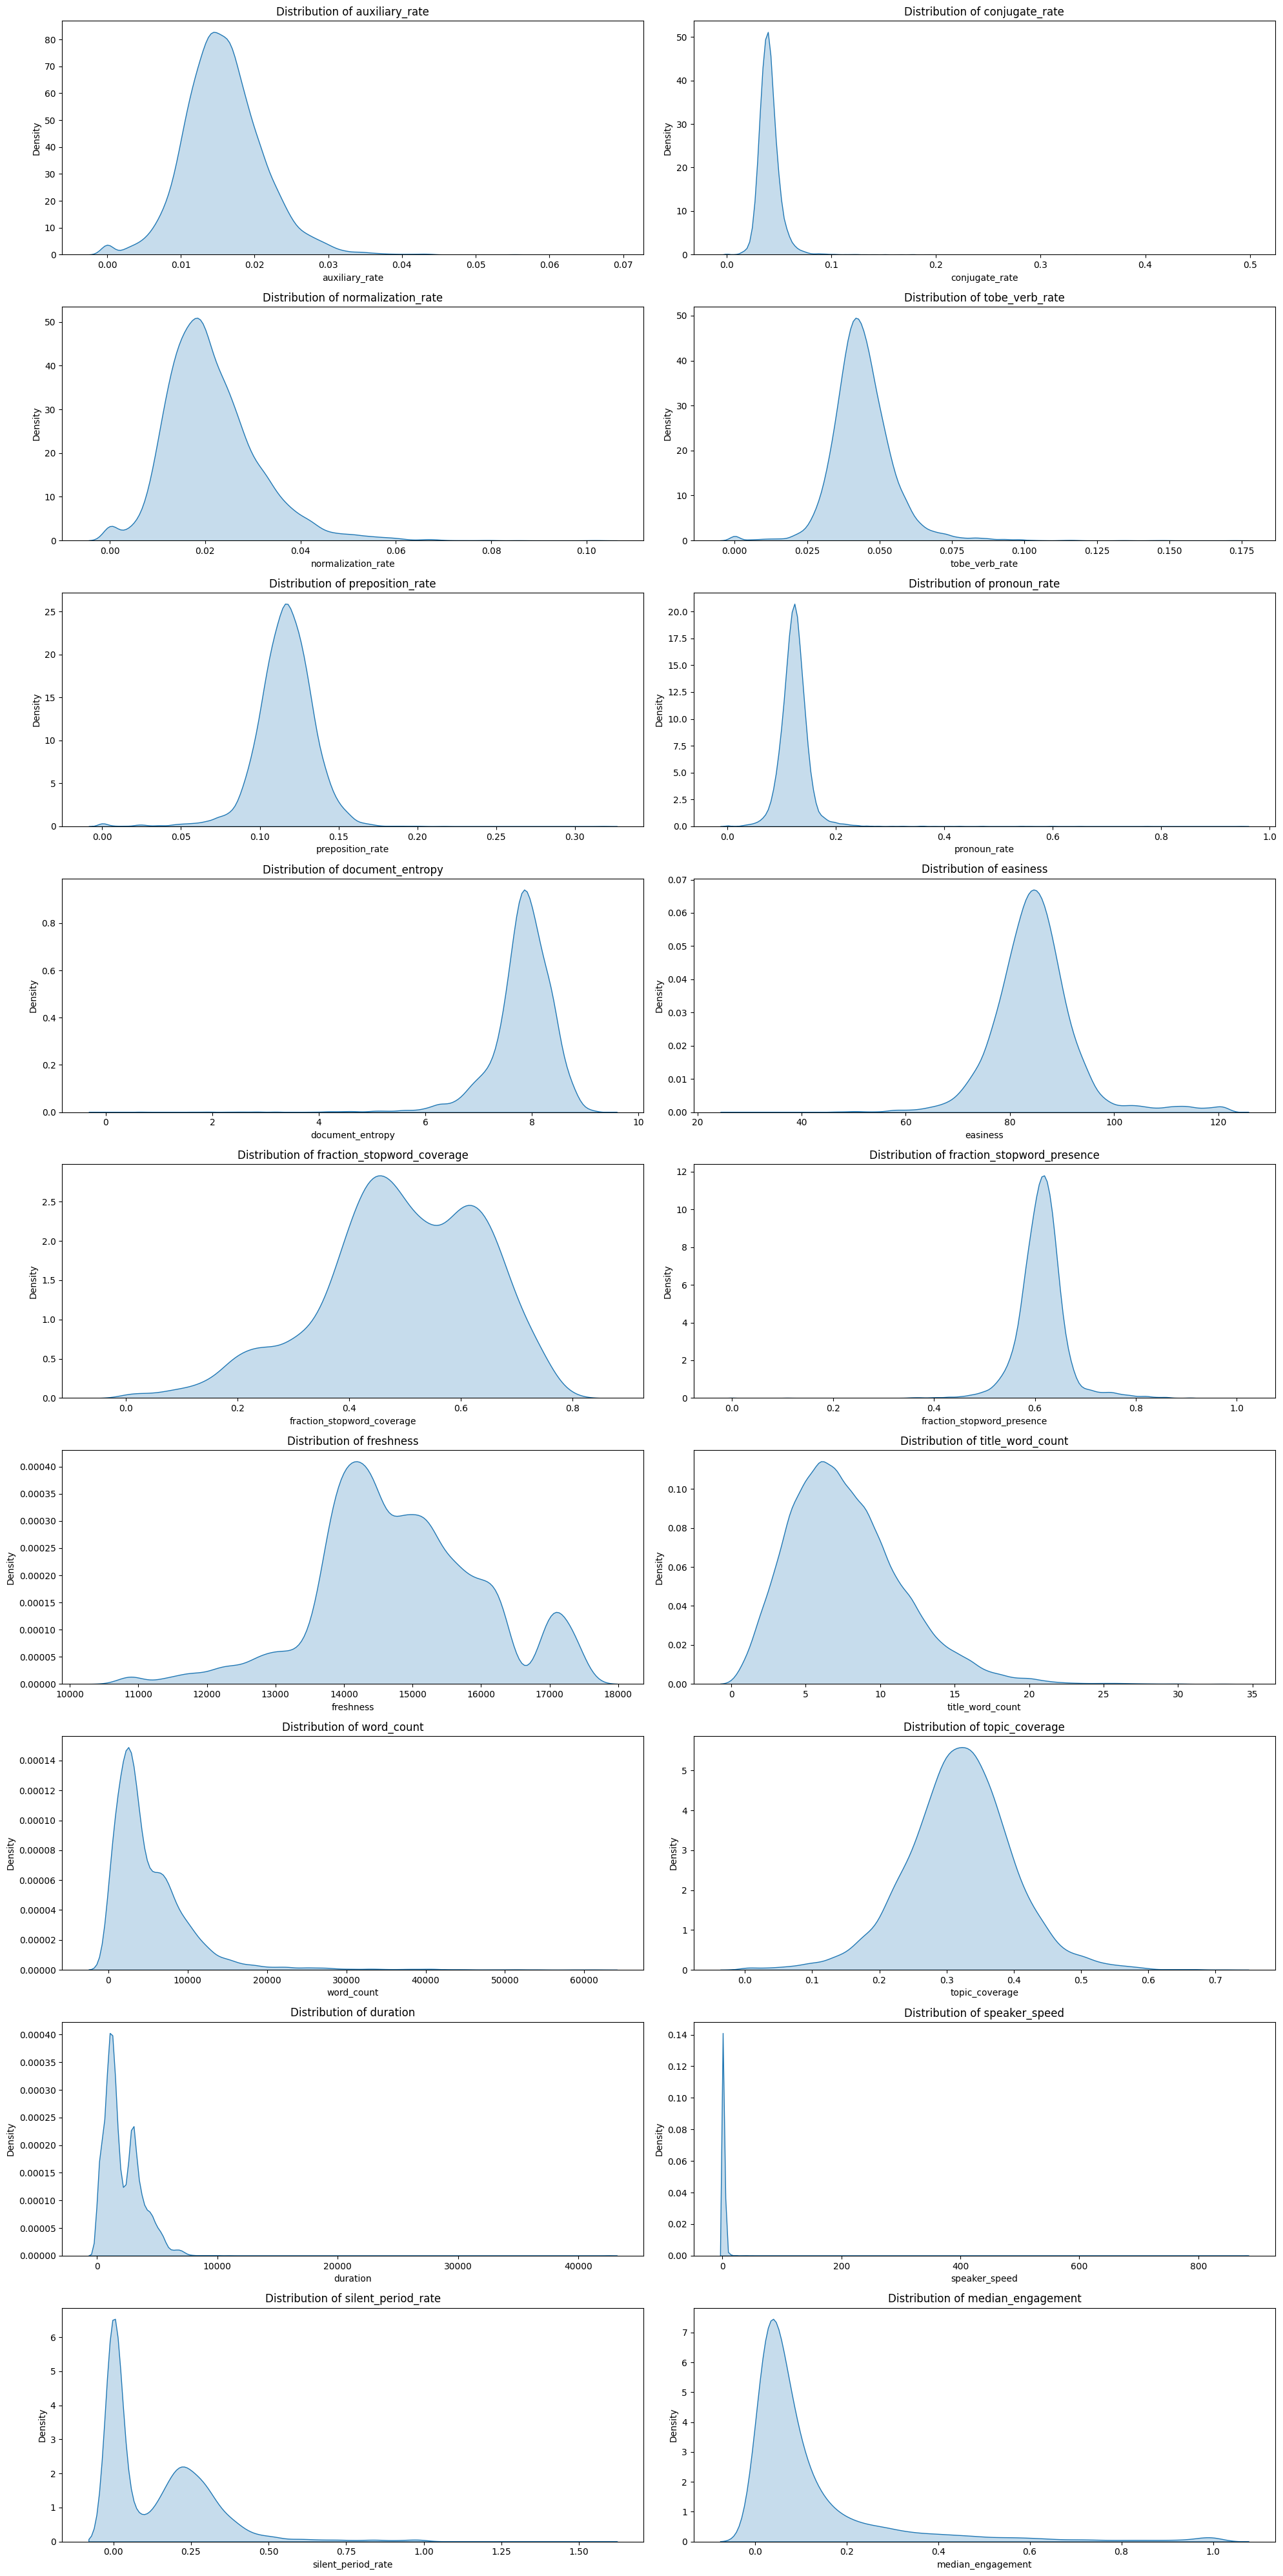

In [18]:
# Identify continuous columns excluding the target variable
cont_col = [col for col in lecture_copy.columns if lecture_copy[col].dtypes in ['int64', 'float64']]

# Create subplots with a grid structure (9 rows, 2 columns)
fig, ax = plt.subplots(9, 2, figsize=(20, 40))  # Adjust figsize to fit the plots

# Iterate through the continuous columns and plot in subplots
for idx, x in enumerate(cont_col):
    row, coln = divmod(idx, 2)  # Calculate row and column indices for the subplot
    sns.kdeplot(data=lecture_copy, x=x, fill=True, ax=ax[row, coln])  # Plot on the respective subplot
    ax[row, coln].set_title(f"Distribution of {x}")  # Add title to each subplot


# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

### Categorical Data Analysis

#### Number of unique values in categorical features.


**JUSTIFICATION**

Helps to identify the cardinality of different feature, this would help with encoding. from this, 'most_covered_topic' has large number of unique values hence may require specialized handling, such as hashing or embedding, to avoid overfitting or excessive computational complexity.

In [19]:
#Finding the unique values in categorical features.

for col in cat_col:
    unique_subject_domain = lecture_copy[col].nunique(dropna=False)
    print(f"{col.upper()} has: {unique_subject_domain} unique values")
    print("\n")

SUBJECT_DOMAIN has: 4 unique values


MOST_COVERED_TOPIC has: 2096 unique values


LECTURE_TYPE has: 17 unique values


HAS_PARTS has: 3 unique values




#### Visualising the Distribution of Categorical features using Pie charts.

The following pie charts can be used to observe any class imbalances and how much each class contrinutes to a feature in the dataset.

**ANALYSIS**

There  is a big class imbalance in HAS_PARTS with false class, which would require specialized handling, such as hashing or embedding, to avoid overfitting or excessive computational complexity.

For features with low number of unique features, one-hot encoding is sufficient. whereas features with high number of unique values would require label encoding or target encoding.

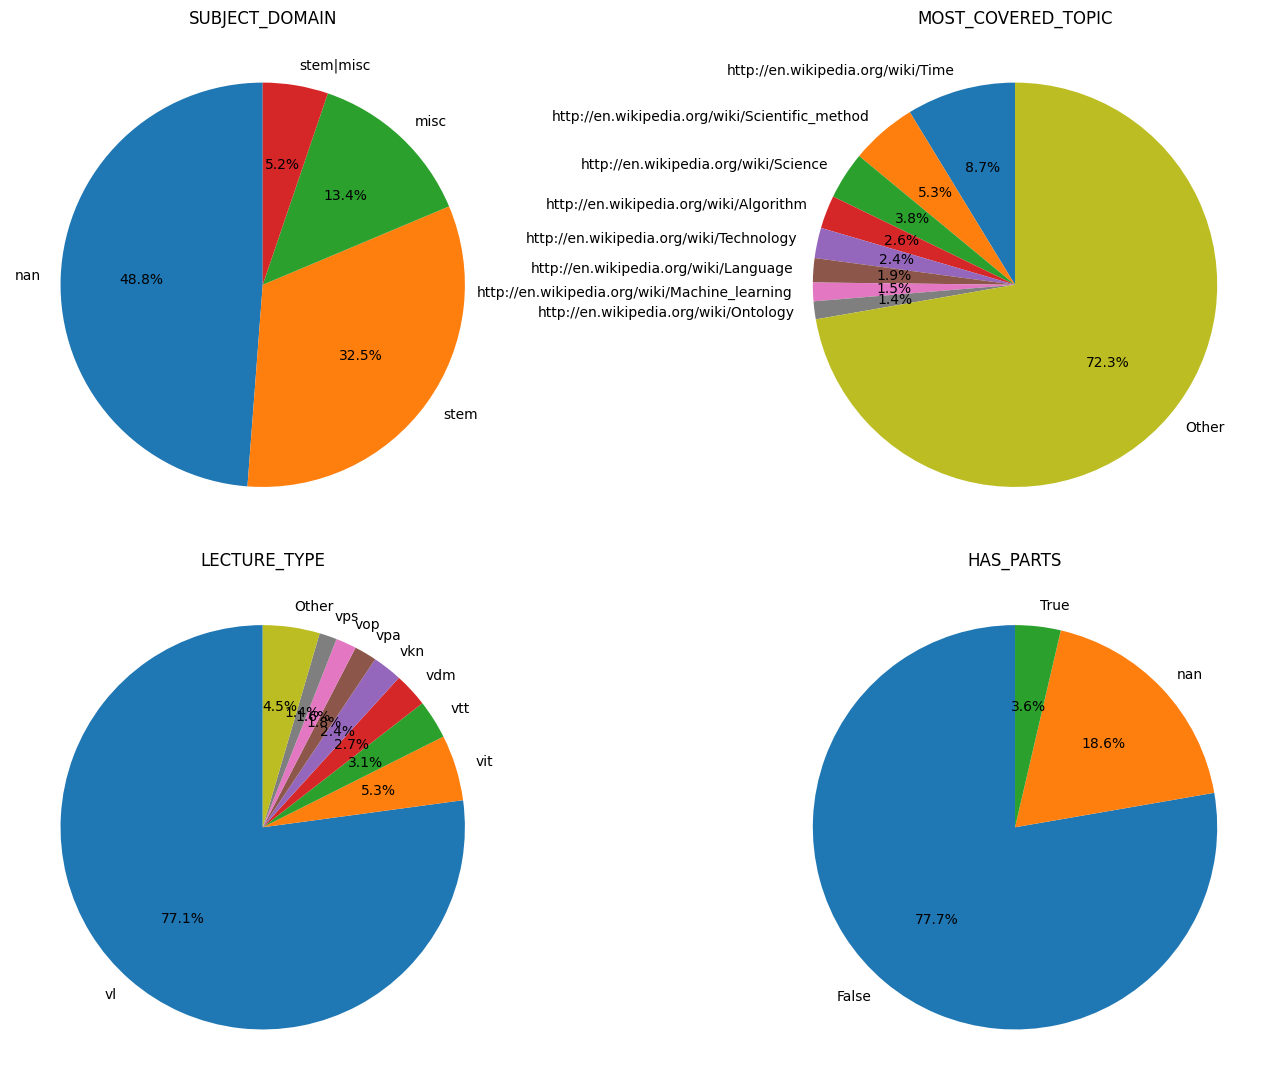

In [20]:
fix, ax = plt.subplots(2, 2, figsize=(13, 11))

# Loop through each categorical column
for idx, col in enumerate(cat_col):
    value_counts = lecture_copy[col].value_counts(dropna=False)  # Get frequency of values
    unique_num = lecture_copy[col].nunique(dropna=False)  # Count unique values, including NaN

    if unique_num >= 15:  # If many unique values, group the less common ones as "Other"
        main_labels = value_counts.head(8).index.to_list()
        labels = main_labels + ['Other']
        value_counts = value_counts.head(8)
        value_counts['Other'] = lecture_copy[col].isin(
            [val for val in lecture_copy[col] if val not in value_counts.index.to_list()]
        ).sum()
    else:
        labels = value_counts.index.to_list()

    # Create a pie chart for the current column
    ax[idx // 2, idx % 2].pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[idx // 2, idx % 2].set_title(col.upper())
    ax[idx // 2, idx % 2].grid()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

#### Analysis of Missing and False Values in has_parts with Impact on median_engagement


**The code below shows the impact on the 'has_parts' feature when mode imputation is applied(i.e when missing data points are assigned to the most frequent category in the feature.)**

Plot 1: Outputs the class distribution of the 'has_parts' feature including missing data points.

Plot 2: This plot overlays the density distributions of median_engagement for rows where has_parts is False and where it is missing (NaN).

Plot 3: This plot shows the distribution of the has_parts feature after imputing all missing (NaN) values with the dominant class (False).

Plot 4: This plot compares the density distribution of median_engagement for rows where has_parts is False before and after imputation.

**ANALYSIS**

From the graphs below we can see that by implementing mode imputation, the new density distribution for rows with false values is more closer to the initial distribution.

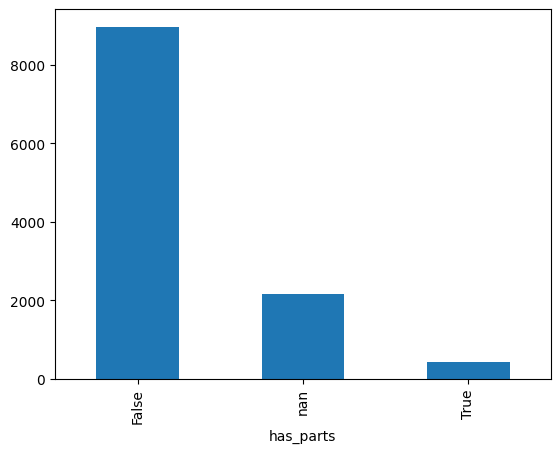

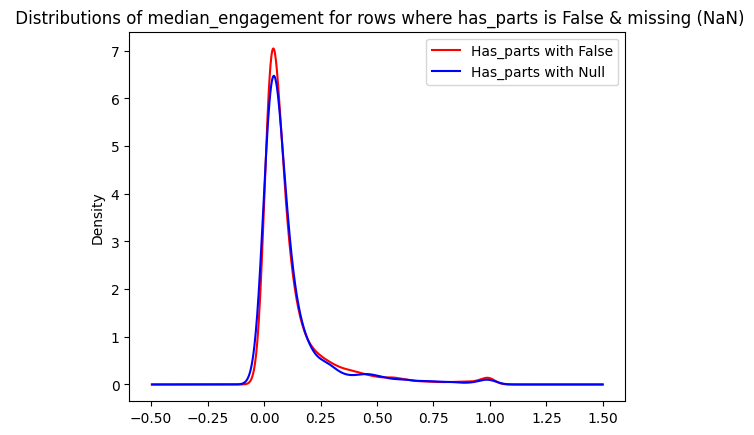

<ipython-input-97-39d9716010a4>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lecture_copy_hpenc['has_parts'].fillna(False, inplace=True)
<ipython-input-97-39d9716010a4>:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lecture_copy_hpenc['has_parts'].fillna(False, inplace=True)


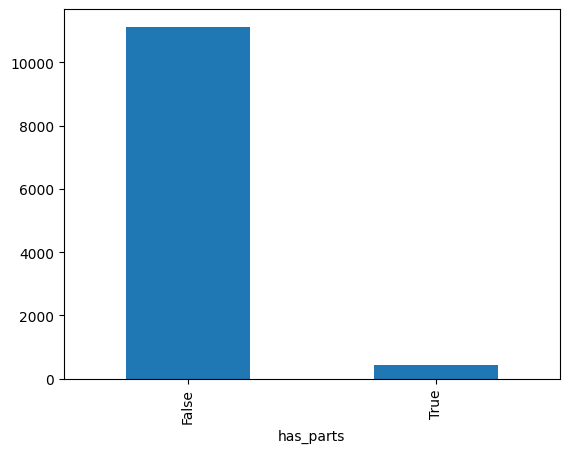

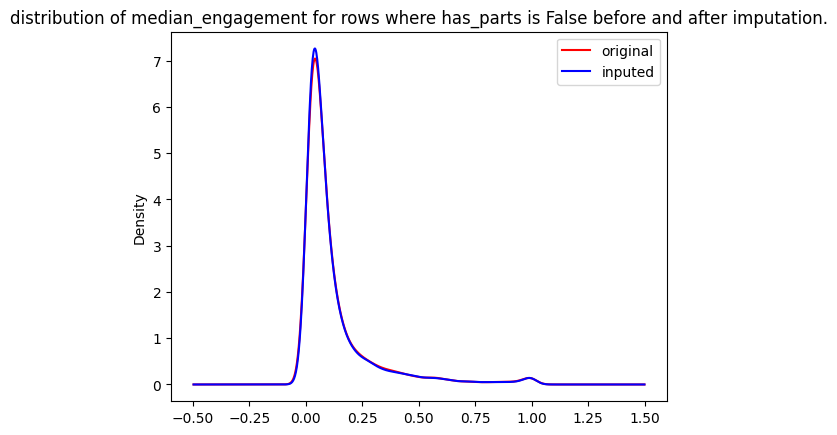

In [97]:
lecture_copy_hpenc = lecture_copy.copy()

lecture_copy_hpenc['has_parts'].value_counts(dropna=False).plot.bar()

fig, ax =plt.subplots()
lecture_copy_hpenc[lecture_copy_hpenc['has_parts']== False]['median_engagement'].plot(kind='kde', ax=ax, color='red')
lecture_copy_hpenc[lecture_copy_hpenc['has_parts'].isnull()]['median_engagement'].plot(kind='kde', ax=ax, color='blue')
lines, labels = ax. get_legend_handles_labels()
labels = ['Has_parts with False','Has_parts with Null']
ax.legend(lines, labels, loc='best')
plt.title( ' Distributions of median_engagement for rows where has_parts is False & missing (NaN)')
plt.show()

temp = lecture_copy_hpenc[lecture_copy_hpenc['has_parts']== False]['median_engagement']
lecture_copy_hpenc['has_parts'].fillna(False, inplace=True)
lecture_copy_hpenc['has_parts'].value_counts(dropna=False).plot.bar()

fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax, color='red')
lecture_copy_hpenc[lecture_copy_hpenc['has_parts']== False]['median_engagement'].plot(kind='kde', ax=ax, color='blue')
lines, labels = ax. get_legend_handles_labels()
labels = ['original','inputed']
ax.legend(lines, labels, loc='best')
plt.title( 'distribution of median_engagement for rows where has_parts is False before and after imputation.')
plt.show()



#### Question

Summarise the key findings of your analyses.

- Missing values are only present in has parts and subject domain features.

- There are many unusual zeros in most of the features which would be needed to be further analysed.

- Silent period rate has the highest numeber of zero values, this is very unusual, since is is not common to have a vlaue zero for this feature, since after further analysis i have checked that the zero values for the silent period rate feature are also present in the all of the lecture types features. so it is not just one lecture type such as animation which would be understnadable to have zero silent period rate value, this suggests that the zero values are likely due to not being calculated.

- Freshness feature has the strongest correlation with the median engagement(target variable) feature.

- There are a significant number of outliers, which have reduced the dataset from about 11000 to about 8300 data points. This is about ~25% loss of data points, which is substantial. This loss means we are discarding a significant portion of the available information, potentially reducing the representativeness and robustness of your model.

- Features lecture type and has parts has the biggest class imbalance, with subject domain having the largest proportion of missing values.

- very large number of cetegories in the 'most_covered_topic' feature.
- By looking at the normal distribution of each feature, most of the features are distributed normally, silent_period_rate feature has two peaks, with one peak caused by the large number of zero values.

## Deriving conclusions from the analysis and implementing data preprocessing.
Derived conclusions and implemented preprocessing steps based on the analyses carried out in the previous question. 


#### Question: Justification

Steps used for encoding the data in the code cells below.
1. Capitalising the column names.
2. replacing zero values in certain columns, where zeros are abnormal with nan- some features like conjugation_rate, it would be impossible to have zero values, hence converted to nan to be not treated as normal zero values.
3. Calculating and removing Outliers - done becuase Outliers can skew the mean and standard deviation.
4. Placing the missing vlaues in has parts feature in the False category- This is because the false category is very dominating creating a big class imbalance compared to the number of missing values which were very small.

5. Placing the missing values in subject_domain feature in another column-This is used since approximatedly 48.8% of the vaues are empty/nan, instead of imputation, creating a seperate column for the missing data can capture the significance of missingness in this feature.

6. Frequency encoding in most covered topic feature-feature appears to have a large number of unique values, many of which occur infrequently. Encoding each unique value with a separate one-hot vector would significantly increase the dimensionality of the dataset, leading to memory inefficiency and potentially overfitting.
7. Frequency encoding in lecture_type_processing feature - used due to high cardinality.
8. One hot encoding has_parts_encoding feature - used to represent categorical variables as binary vectors.
9. KNN imputation on silent_period_rate feature - used to represent categorical variables as binary vectors.
10. Standardising all the features - Standardization ensures that features with larger scales do not dominate those with smaller scales, leading to better performance and more accurate models.


Note: I  have to split the data near the start of the preprocess_lecture_dataset() so there is no data leakage when imputing missing values for features(most_covered_topic, lecture_type, and silent_period_rate)


In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LinearRegression # Changed from LogisticRegression to LinearRegression
from sklearn.metrics import mean_squared_error # Changed from accuracy_score to mean_squared_error
from sklearn.preprocessing import StandardScaler # Import the StandardScaler class

In [23]:
def preprocess_lecture_dataset(dataset):
    """
    takes the lecture dataset and transforms it with necessary pre-processing steps.

    Params:
        dataset (pandas.DataFrame): DataFrame object that contains the original dataset provided for the coursework

    Returns:
        preprocessed_dataset (pandas.DataFrame): DataFrame object that contains the dataset after data
                                                pre-processing has been carried out
    """
    data0 = dataset.copy()
    data = capitalize(data0)

    data1 = nan_replace(data)

    data2 = outliers(data1)

    data3 = has_parts_processing(data2)

    data4= subject_domain_processing(data3)


    def split_data(data):
        X = data.drop('MEDIAN_ENGAGEMENT', axis=1)
        y = data['MEDIAN_ENGAGEMENT']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
        return X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = split_data(data4)


    X_train1, X_test1, y_train1, y_test1 = most_covered_topic_processing( X_train, X_test, y_train, y_test)
    X_train2, X_test2, y_train2, y_test2 = lecture_type_processing(X_train1, X_test1, y_train1, y_test1)


    #concatenate the training and testing data.
    def join(X_train, X_test, y_train, y_test):
        X_train_copy = X_train.copy()
        X_test_copy = X_test.copy()
        y_train_copy = y_train.copy()
        y_test_copy = y_test.copy()

        # Combine X_train_trf and X_test_trf back into a single DataFrame
        X_combined = pd.concat([pd.DataFrame(X_train_copy, columns=X_train.columns, index=X_train.index),
                                pd.DataFrame(X_test_copy, columns=X_test.columns, index=X_test.index)])

        # Combine y_train and y_test back into a single Series
        y_combined = pd.concat([pd.Series(y_train_copy, index=X_train.index),
                                pd.Series(y_test_copy, index=X_test.index)])

        # Combine the features and target variable into a single DataFrame
        original_dataset = pd.concat([X_combined, y_combined.rename("MEDIAN_ENGAGEMENT")], axis=1)

        # Sort by the original index to restore the original order (optional)
        original_dataset = original_dataset.sort_index()

        return original_dataset, X_train, X_test, y_train, y_test

    data5, X_train3, X_test3, y_train3, y_test3 = join(X_train2, X_test2, y_train2, y_test2)


    data6 = subject_domain_encoding(data5)

    data7 = has_parts_encoding(data6)

    X_train4 = data7.loc[X_train3.index].drop('MEDIAN_ENGAGEMENT', axis=1)
    X_test4 = data7.loc[X_test3.index].drop('MEDIAN_ENGAGEMENT', axis=1)
    y_train4 = data7.loc[y_train3.index]['MEDIAN_ENGAGEMENT']
    y_test4 = data7.loc[y_test3.index]['MEDIAN_ENGAGEMENT']

# knn doens't get the x_train data from the subject domain encoding and has parts encoding functions,
    data8 = KNNimputation(data7,X_train4, X_test4, y_train4, y_test4)

    preprocessed_dataset = standardscalor(data8)


    return preprocessed_dataset

In [24]:

#Capitalising the column names.
def capitalize(data):
    data.columns = [col.upper() for col in data.columns]
    return data




#replacing zero values in certain columns, where zeros are abnormal with nan.
def nan_replace(data):
    data = data.replace(to_replace=[None, ''], value=np.nan)

    # #Replacing zeros with empty values.
    columns_to_replace = ['AUXILIARY_RATE', 'CONJUGATE_RATE', 'NORMALIZATION_RATE',
           'TOBE_VERB_RATE', 'PREPOSITION_RATE', 'PRONOUN_RATE',
           'DOCUMENT_ENTROPY', 'EASINESS', 'FRACTION_STOPWORD_COVERAGE',
           'FRACTION_STOPWORD_PRESENCE', 'SILENT_PERIOD_RATE']

    data[columns_to_replace] = data[columns_to_replace].replace(0, np.nan)
    return data




# Calculating and removing Outliers.
def outliers(data):

    all_outliers = pd.DataFrame()
    num_col_out = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and col not in ['DOCUMENT_ENTROPY', 'FRESHNESS', 'TITLE_WORD_COUNT', 'WORD_COUNT', 'TOPIC_COVERAGE']]
    num_col1 = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]

    for col in num_col_out:
        Q1 = data[col].quantile(0.25)  # First quartile
        Q3 = data[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range.
        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        col_outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        all_outliers = pd.concat([all_outliers, col_outliers])
        print()
    # Drop duplicate rows (if an outlier exists in multiple columns)
    all_outliers = all_outliers.drop_duplicates()
    total_val = data.size
    dataset_cleaned = data[~data.index.isin(all_outliers.index)]

    data = dataset_cleaned
    return data



# Placing the missing vlaues in has parts feature in the False category.
def has_parts_processing(data):
    data['HAS_PARTS'] = data['HAS_PARTS'].fillna(False)
    return data




# Placing the missing values in subject domain in another column.
def subject_domain_processing(data):
    data['SUBJECT_DOMAIN'] = data['SUBJECT_DOMAIN'].fillna('Missing')
    return data





# Frequency encoding in most covered topic feature
def most_covered_topic_processing(X_train, X_test, y_train, y_test):

    mct_frequency_map = X_train['MOST_COVERED_TOPIC'].value_counts().to_dict()
    X_train['MOST_COVERED_TOPIC'] = X_train['MOST_COVERED_TOPIC'].map(mct_frequency_map)
    X_test['MOST_COVERED_TOPIC'] = X_test['MOST_COVERED_TOPIC'].map(mct_frequency_map).fillna(0)

    return X_train, X_test, y_train, y_test





# Frequency encoding in lecture_type_processing feature
def lecture_type_processing(X_train, X_test, y_train, y_test):

    mct_frequency_map = X_train['LECTURE_TYPE'].value_counts().to_dict()
    X_train['LECTURE_TYPE'] = X_train['LECTURE_TYPE'].map(mct_frequency_map)
    X_test['LECTURE_TYPE'] = X_test['LECTURE_TYPE'].map(mct_frequency_map).fillna(0)
    return X_train, X_test, y_train, y_test

def subject_domain_encoding(data):
    ohe_sd = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

    df_copy = pd.DataFrame()

    if 'SUBJECT_DOMAIN' in data.columns:
        df_copy = data.copy()
        ohetransform_sd = ohe_sd.fit_transform(df_copy[['SUBJECT_DOMAIN']])
        df_copy = pd.concat([df_copy, ohetransform_sd], axis=1).drop(columns=['SUBJECT_DOMAIN'])
        columns_to_reorder = [col for col in df_copy.columns if col.startswith('SUBJECT_DOMAIN_')]

        insert_position = 10
        # Iterate through the list of columns and pop them from the DataFrame
        for i, column in enumerate(columns_to_reorder):
            column_data = df_copy.pop(column)  # Pop the column from the DataFrame
            df_copy.insert(insert_position + i, column, column_data)  # Insert at the desired position

    return df_copy





# One hot encoding has_parts_encoding feature.
def has_parts_encoding(data):
    ohe_hp = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

    pd.set_option('display.max_columns', None)

    df_copy1 = pd.DataFrame()

    if 'HAS_PARTS' in data.columns:
        df_copy1 = data.copy()
        ohetransform_hp = ohe_hp.fit_transform(df_copy1[['HAS_PARTS']])
        df_copy1 = pd.concat([df_copy1, ohetransform_hp], axis=1).drop(columns=['HAS_PARTS'])
        columns_to_reorder = [col for col in df_copy1.columns if col.startswith('HAS_PARTS_')]

        insert_position = 18
        # Iterate through the list of columns and pop them from the DataFrame
        for i, column in enumerate(columns_to_reorder):
            column_data = df_copy1.pop(column)  # Pop the column from the DataFrame
            df_copy1.insert(insert_position + i, column, column_data)  # Insert at the desired position

    return df_copy1





# KNN imputation on silent_period_rate feature.
def KNNimputation(data, X_train, X_test, y_train, y_test):

    knn = KNNImputer(n_neighbors=10)
    X_train_imputed = knn.fit_transform(X_train)
    X_test_imputed = knn.transform(X_test)

    # Using Linear Regression model instead of Logistic Regression
    lr = LinearRegression() # Changed from LogisticRegression to LinearRegression
    lr.fit(X_train_imputed, y_train)

    y_pred = lr.predict(X_test_imputed)

    # Using an appropriate metric for regression
    # mean_squared_error is commonly used for regression problems
    accuracy = mean_squared_error(y_test, y_pred) # Changed from accuracy_score to mean_squared_error and using MSE as the evaluation metric
    print(f"Mean Squared Error: {accuracy}") # Changed the print statement to reflect the change in metric
    print(f"Variance of y_test: {y_test.var()}")
    print(f"Range of y_test: {y_test.min()} to {y_test.max()}")
    from sklearn.metrics import r2_score
    r2 = r2_score(y_test, y_pred)
    print(f"R² Score: {r2}")


    # Combine X_train_trf and X_test_trf back into a single DataFrame
    X_combined = pd.concat([pd.DataFrame(X_train_imputed, columns=X_train.columns, index=X_train.index),
                            pd.DataFrame(X_test_imputed, columns=X_test.columns, index=X_test.index)])

    # Combine y_train and y_test back into a single Series
    y_combined = pd.concat([pd.Series(y_train, index=X_train.index),
                            pd.Series(y_test, index=X_test.index)])

    # Combine the features and target variable into a single DataFrame
    original_dataset = pd.concat([X_combined, y_combined.rename("MEDIAN_ENGAGEMENT")], axis=1)

    # Sort by the original index to restore the original order (optional)
    original_dataset = original_dataset.sort_index()

    return original_dataset






# Standardising all the features.
def standardscalor(data):
    X_ss = data.drop('MEDIAN_ENGAGEMENT', axis=1)
    y_ss = data['MEDIAN_ENGAGEMENT']
        # Scale features
    scaler_X = StandardScaler()
    X_scaled = scaler_X.fit_transform(X_ss)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X_ss.columns, index=X_ss.index)
    data = pd.concat([X_scaled_df, y_ss], axis=1)
    return data

In [25]:
preprocessed_lectures = preprocess_lecture_dataset(lectures)

<ipython-input-24-ec4635a380e8>:43: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['HAS_PARTS'] = data['HAS_PARTS'].fillna(False)
<ipython-input-24-ec4635a380e8>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HAS_PARTS'] = data['HAS_PARTS'].fillna(False)
<ipython-input-24-ec4635a380e8>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

Mean Squared Error: 0.002078333468877584
Variance of y_test: 0.003127129494842572
Range of y_test: 0.003492302 to 0.266379666
R² Score: 0.33498484645572846


In [26]:
preprocessed_lectures.head(5)

,AUXILIARY_RATE,CONJUGATE_RATE,NORMALIZATION_RATE,TOBE_VERB_RATE,PREPOSITION_RATE,PRONOUN_RATE,DOCUMENT_ENTROPY,EASINESS,FRACTION_STOPWORD_COVERAGE,FRACTION_STOPWORD_PRESENCE,SUBJECT_DOMAIN_Missing,SUBJECT_DOMAIN_misc,SUBJECT_DOMAIN_stem,SUBJECT_DOMAIN_stem|misc,FRESHNESS,TITLE_WORD_COUNT,WORD_COUNT,MOST_COVERED_TOPIC,HAS_PARTS_False,HAS_PARTS_True,TOPIC_COVERAGE,DURATION,LECTURE_TYPE,SPEAKER_SPEED,SILENT_PERIOD_RATE,MEDIAN_ENGAGEMENT
1,-0.351209,-1.253553,-0.283907,-0.906620,-1.544000,-1.114142,0.973611,0.474451,0.728098,-0.927145,1.012022,-0.395367,-0.691099,-0.223451,0.594611,-0.502867,0.714350,-0.626144,0.055015,-0.055015,-0.442624,0.437332,0.450811,0.976798,-0.207595,0.011989
2,0.706476,-0.888606,1.298092,-0.764415,0.045938,0.119694,0.028107,-0.453343,0.003829,-0.213045,-0.988121,-0.395367,1.446972,-0.223451,0.820855,-1.307317,-0.297042,-0.576727,0.055015,-0.055015,-0.737049,-0.454017,-2.105958,0.712634,-0.416313,0.041627
3,1.701442,0.452418,-0.533925,0.424402,0.350680,-1.036536,0.521599,-0.784239,-0.198966,-0.618217,-0.988121,-0.395367,1.446972,-0.223451,0.762199,0.301584,-0.731430,-0.285715,0.055015,-0.055015,-0.223284,-0.766370,0.450811,-0.041890,-1.156978,0.064989
4,1.192772,0.286701,0.331209,-0.624787,0.926141,-1.137144,0.572740,-1.391224,0.322507,-1.023576,1.012022,-0.395367,-0.691099,-0.223451,0.184020,0.301584,-0.117682,-0.565746,0.055015,-0.055015,1.263684,-0.210229,-2.242502,0.393305,0.334419,0.052154
5,0.386279,-0.366945,0.362513,-0.055728,1.394881,-1.350069,0.633146,-1.433061,-0.025142,-1.237502,-0.988121,2.529293,-0.691099,-0.223451,1.239825,0.569734,-0.345619,2.728736,0.055015,-0.055015,0.199944,-0.339741,0.450811,-0.080412,-1.296608,0.256300


In [27]:
preprocessed_lectures.shape

(8285, 26)

#### Reason for using KNN imputation for Silent_period_rate

**Reason for using KNN imputation for Silent_period_rate is because it can be classed as Missing at random. The missingnees in this feature is shown to be mostly dependent on the freshness feature.**

In [28]:
lecture_copy_sprc_old = lecture_copy.copy()                     #copies from the initial dataset.

lecture_copy_sprc_new = preprocessed_lectures.copy()        ##copies from the preprocessed dataset.

num_null = lecture_copy_sprc_old[lecture_copy_sprc_old['silent_period_rate'] == 0 ].shape[0]

print(f"Percentage of Null values in Silent_period_rate: {(num_null)/(lecture_copy_sprc_old.shape[0])}")

Percentage of Null values in Silent_period_rate: 0.3993765154139245


**Excluding the subject_domain_features, freshness features  has the strongest correlation to the missingness to the subject_domain missing values**


Code below to show silent_period_rate feature missingness/zero values depend on another feature.

NOTE: I have created another preprocessing functin so that the data can be converted to numerical data for analysis and so can use all the features.

In [30]:
def silent_period_rate_analysis(dataset):
    """
    takes the lecture dataset and transforms it with necessary pre-processing steps.

    Params:
        dataset (pandas.DataFrame): DataFrame object that contains the original dataset provided for the coursework

    Returns:
        preprocessed_dataset (pandas.DataFrame): DataFrame object that contains the dataset after data
                                                pre-processing has been carried out
    """
    data0 = dataset.copy()
    data = capitalize(data0)

    data1 = nan_replace(data)

    data2 = outliers(data1)

    data3 = has_parts_processing(data2)

    data4= subject_domain_processing(data3)

#We have to split the data here so there is no data leakage when imputing missing values for features(most
# covered_topic, lecture_type, and silent_period_rate)

    def split_data(data):
        X = data.drop('MEDIAN_ENGAGEMENT', axis=1)
        y = data['MEDIAN_ENGAGEMENT']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
        return X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = split_data(data4)


    X_train1, X_test1, y_train1, y_test1 = most_covered_topic_processing( X_train, X_test, y_train, y_test)
    X_train2, X_test2, y_train2, y_test2 = lecture_type_processing(X_train1, X_test1, y_train1, y_test1)


    #concatenate the training and testing data.
    def join(X_train, X_test, y_train, y_test):
        X_train_copy = X_train.copy()
        X_test_copy = X_test.copy()
        y_train_copy = y_train.copy()
        y_test_copy = y_test.copy()

        # Combine X_train_trf and X_test_trf back into a single DataFrame
        X_combined = pd.concat([pd.DataFrame(X_train_copy, columns=X_train.columns, index=X_train.index),
                                pd.DataFrame(X_test_copy, columns=X_test.columns, index=X_test.index)])

        # Combine y_train and y_test back into a single Series
        y_combined = pd.concat([pd.Series(y_train_copy, index=X_train.index),
                                pd.Series(y_test_copy, index=X_test.index)])

        # Combine the features and target variable into a single DataFrame
        original_dataset = pd.concat([X_combined, y_combined.rename("MEDIAN_ENGAGEMENT")], axis=1)

        # Sort by the original index to restore the original order (optional)
        original_dataset = original_dataset.sort_index()

        return original_dataset, X_train, X_test, y_train, y_test

    data5, X_train3, X_test3, y_train3, y_test3 = join(X_train2, X_test2, y_train2, y_test2)


    data6 = subject_domain_encoding(data5)

    data7 = has_parts_encoding(data6)


    preprocessed_data = standardscalor(data7)


    return preprocessed_data

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the DataFrame
lecture_copy_sp1 = lecture_copy.copy()
lecture_copy_sp = silent_period_rate_analysis(lecture_copy_sp1)


# Add a missing indicator column for 'subject_domain'
lecture_copy_sp['missing_indicator'] = (lecture_copy_sp['SILENT_PERIOD_RATE'].isnull() ).astype(int)



# # Compute correlations
correlations = lecture_copy_sp.corr()['missing_indicator']

# Print correlations
print(correlations)














AUXILIARY_RATE                0.043889
CONJUGATE_RATE                0.056473
NORMALIZATION_RATE           -0.017524
TOBE_VERB_RATE                0.061193
PREPOSITION_RATE             -0.273770
PRONOUN_RATE                  0.042735
DOCUMENT_ENTROPY              0.088900
EASINESS                     -0.032139
FRACTION_STOPWORD_COVERAGE   -0.039293
FRACTION_STOPWORD_PRESENCE   -0.128511
SUBJECT_DOMAIN_Missing       -0.050722
SUBJECT_DOMAIN_misc           0.073494
SUBJECT_DOMAIN_stem          -0.018242
SUBJECT_DOMAIN_stem|misc      0.041169
FRESHNESS                     0.353029
TITLE_WORD_COUNT              0.002865
WORD_COUNT                   -0.063610
MOST_COVERED_TOPIC           -0.000990
HAS_PARTS_False               0.030679
HAS_PARTS_True               -0.030679
TOPIC_COVERAGE               -0.053366
DURATION                     -0.083575
LECTURE_TYPE                 -0.049605
SPEAKER_SPEED                 0.044874
SILENT_PERIOD_RATE                 NaN
MEDIAN_ENGAG

<ipython-input-24-ec4635a380e8>:43: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['HAS_PARTS'] = data['HAS_PARTS'].fillna(False)
<ipython-input-24-ec4635a380e8>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HAS_PARTS'] = data['HAS_PARTS'].fillna(False)
<ipython-input-24-ec4635a380e8>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

**Freshness feature shows the most corrlation for the missing values for silent_period_rate.**

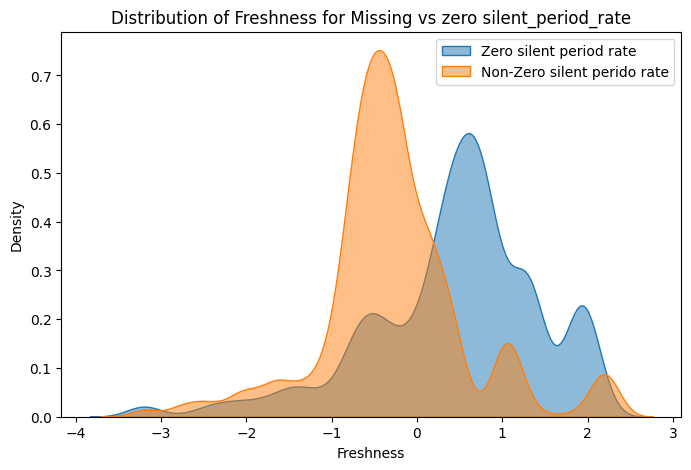

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create two groups: rows with missing and non-missing subject_domain
zero_group = lecture_copy_sp[lecture_copy_sp['SILENT_PERIOD_RATE'].isna()]

# print(missing_group.shape)
non_zero_group = lecture_copy_sp[~(lecture_copy_sp['SILENT_PERIOD_RATE'].isna())]
# print(non_missing_group.shape)

# Compare distributions of freshness
plt.figure(figsize=(8, 5))
sns.kdeplot(zero_group['FRESHNESS'], label='Zero silent period rate', fill=True, alpha=0.5)
sns.kdeplot(non_zero_group['FRESHNESS'], label='Non-Zero silent perido rate', fill=True, alpha=0.5)
plt.title("Distribution of Freshness for Missing vs zero silent_period_rate")
plt.xlabel("Freshness")
plt.legend()
plt.show()

The code above shows that the freshness feature has some affect on the missingness of the data in silent_period_domain.

In [33]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Step 1: Create a missingness indicator for `subject_domain`
lecture_copy_sp['MISSING_SILENT_PERIOD_RATE'] = lecture_copy_sp['SILENT_PERIOD_RATE'].isnull().astype(int)

# Step 2: Bin the `freshness` feature into categories
# You can decide the number of bins based on your dataset (e.g., 5 bins here)
lecture_copy_sp['FRESHNESS_BINS'] = pd.cut(lecture_copy_sp['FRESHNESS'], bins=5, labels=False)

# Step 3: Create a contingency table
contingency_table = pd.crosstab(lecture_copy_sp['FRESHNESS_BINS'], lecture_copy_sp['MISSING_SILENT_PERIOD_RATE'])

# Step 4: Perform the chi-square test.
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results.
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)

# Optional: Print the contingency table and expected frequencies
print("\nContingency Table:")
print(contingency_table)
print("\nExpected Frequencies:")
print(expected)

Chi-Square Statistic: 2011.958973743965
P-value: 0.0
Degrees of Freedom: 4

Contingency Table:
MISSING_SILENT_PERIOD_RATE     0     1
FRESHNESS_BINS                        
0                            148    79
1                            429   182
2                           3209   614
3                           1000  1567
4                            249   808

Expected Frequencies:
[[ 137.95353048   89.04646952]
 [ 371.31985516  239.68014484]
 [2323.33192517 1499.66807483]
 [1560.02957151 1006.97042849]
 [ 642.36511768  414.63488232]]


A high Chi-Square statistic indicates a strong association between the two variables in the contingency table.
P-value (0.0):

The p-value is less than 0.05, which means the null hypothesis (that the missingness in SILENT_PERIOD_RATE and the FRESHNESS feature are independent) is rejected. This suggests a statistically significant association between the two variables.
Degrees of Freedom (4):




**Justificaiton**

**For using KNN imutation for silent_period_rate feature.::**
**The code above prooves that the missingness of the silent_period_rate feature is strongly correlated the freshness feature, Therefore this missingness can be classed as missing at random(MAR) which means KNN imputation can be used.**

## $\color{Red}{Question\ 1.4}$ Numerically encode the dataset for model training.
This question expects you to create the final numerical dataset you will use to carry out model training with ridge regression.

- Implement the `prepare_final_dataset` function to transform different features.
- Features that belong to different data types need to be transformed to an ideal numerical representation
- You may use helper functions in `scikit-learn` machine learning library to implement this function.

In [34]:
def prepare_final_dataset(preprocessed_dataset):
    """
    takes the preprocessed lecture dataset and transforms it to the vector representation.

    Params:
        preprocessed_dataset (pandas.DataFrame): DataFrame object that contains the original
                                                dataset provided for the coursework

    Returns:
        X (pandas.DataFrame): DataFrame object that contains the features
        y (numpy.array): List of labels
    """

    X = preprocessed_dataset.copy()
    y = X['MEDIAN_ENGAGEMENT']
    X = X.drop(columns='MEDIAN_ENGAGEMENT', axis=1)     #.drop creates a new dataframe which needs to be assignes to a variable otherwise it is forgotten.

    return preprocessed_dataset, X, y

In [35]:
final_dataset, full_X, full_y = prepare_final_dataset(preprocessed_lectures)

In [36]:
full_X

,AUXILIARY_RATE,CONJUGATE_RATE,NORMALIZATION_RATE,TOBE_VERB_RATE,PREPOSITION_RATE,PRONOUN_RATE,DOCUMENT_ENTROPY,EASINESS,FRACTION_STOPWORD_COVERAGE,FRACTION_STOPWORD_PRESENCE,SUBJECT_DOMAIN_Missing,SUBJECT_DOMAIN_misc,SUBJECT_DOMAIN_stem,SUBJECT_DOMAIN_stem|misc,FRESHNESS,TITLE_WORD_COUNT,WORD_COUNT,MOST_COVERED_TOPIC,HAS_PARTS_False,HAS_PARTS_True,TOPIC_COVERAGE,DURATION,LECTURE_TYPE,SPEAKER_SPEED,SILENT_PERIOD_RATE
1,-0.351209,-1.253553,-0.283907,-0.906620,-1.544000,-1.114142,0.973611,0.474451,0.728098,-0.927145,1.012022,-0.395367,-0.691099,-0.223451,0.594611,-0.502867,0.714350,-0.626144,0.055015,-0.055015,-0.442624,0.437332,0.450811,0.976798,-0.207595
2,0.706476,-0.888606,1.298092,-0.764415,0.045938,0.119694,0.028107,-0.453343,0.003829,-0.213045,-0.988121,-0.395367,1.446972,-0.223451,0.820855,-1.307317,-0.297042,-0.576727,0.055015,-0.055015,-0.737049,-0.454017,-2.105958,0.712634,-0.416313
3,1.701442,0.452418,-0.533925,0.424402,0.350680,-1.036536,0.521599,-0.784239,-0.198966,-0.618217,-0.988121,-0.395367,1.446972,-0.223451,0.762199,0.301584,-0.731430,-0.285715,0.055015,-0.055015,-0.223284,-0.766370,0.450811,-0.041890,-1.156978
4,1.192772,0.286701,0.331209,-0.624787,0.926141,-1.137144,0.572740,-1.391224,0.322507,-1.023576,1.012022,-0.395367,-0.691099,-0.223451,0.184020,0.301584,-0.117682,-0.565746,0.055015,-0.055015,1.263684,-0.210229,-2.242502,0.393305,0.334419
5,0.386279,-0.366945,0.362513,-0.055728,1.394881,-1.350069,0.633146,-1.433061,-0.025142,-1.237502,-0.988121,2.529293,-0.691099,-0.223451,1.239825,0.569734,-0.345619,2.728736,0.055015,-0.055015,0.199944,-0.339741,0.450811,-0.080412,-1.296608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11540,-1.100043,-0.255425,0.360041,0.348157,0.428066,-2.190339,-0.535200,-1.384868,-1.126030,-0.597841,-0.988121,-0.395367,1.446972,-0.223451,-0.234950,0.033434,-1.011369,-0.351604,0.055015,-0.055015,0.324122,-1.109196,0.450811,0.345820,-0.516516
11542,0.069515,-0.830985,1.461317,1.815710,1.769039,-0.137445,-0.927592,-1.607827,-0.604557,0.332884,1.012022,-0.395367,-0.691099,-0.223451,-0.436056,0.569734,-0.345619,0.795974,0.055015,-0.055015,0.965374,-0.362596,0.450811,0.020754,-0.263502
11543,-0.285756,-0.048620,1.371730,-0.476020,-0.410403,0.365381,-0.483409,-0.695983,-0.256908,-0.009604,-0.988121,-0.395367,1.446972,-0.223451,-0.653920,0.837885,-0.532141,2.728736,0.055015,-0.055015,0.392096,-0.514964,0.450811,-0.220164,-0.092440
11544,2.670401,-0.494590,-0.918428,0.614571,-1.114703,0.744424,-0.430656,1.824546,-0.198966,1.440329,1.012022,-0.395367,-0.691099,-0.223451,-0.595264,-1.307317,-0.370219,-0.620654,0.055015,-0.055015,0.778225,0.208781,0.450811,-1.878052,1.301269


In [37]:
full_y

,MEDIAN_ENGAGEMENT
1,0.011989
2,0.041627
3,0.064989
4,0.052154
5,0.256300
...,...
11540,0.106692
11542,0.032299
11543,0.044655
11544,0.038525


Let us now save the final data

In [38]:
full_X.to_csv("features_final.csv", index=False)
np.save("labels_final.npy", full_y.to_numpy())

# Part 2: Modeling and Evaluation

In this section, we develop a model using the preprocessed data. We start by loading the data that we saved in the previous part.

Check the data types of full_X and full_y.

In [39]:
import numpy as np
import pandas as pd

def check_dataset_type(dataset):
    if isinstance(dataset, np.ndarray):
        print("The dataset is a NumPy array.")
    elif isinstance(dataset, pd.DataFrame):
        print("The dataset is a Pandas DataFrame.")
    elif isinstance(dataset, pd.Series):
        print("The dataset is a Pandas Series.")
    else:
        print(f"The dataset is of type: {type(dataset)}")

check_dataset_type(full_y)
check_dataset_type(full_X)

full_y = full_y.to_numpy()
full_X = full_X.to_numpy()

The dataset is a Pandas Series.
The dataset is a Pandas DataFrame.


In [40]:
full_X = pd.read_csv("features_final.csv")
full_y = np.load("labels_final.npy")

# If you didn't manage to save the preprocessed data structures from part one.
# # You can start the exercise with alternative data. But the performance will be very low.

# full_X = pd.read_csv("features_seed.csv")
# full_y = np.load("labels_seed.npy")

## Train Ridge Regression Model.
In this section i have trained ridge regression model.



In [41]:
from sklearn.linear_model import Ridge

In [42]:
def train_ridge_model(X,y, hyperparams):
    """
    takes the training data with the hyper-parameters to train the ridge model

    Params:
        X (pandas.DataFrame): DataFrame object that contains the features
        y (numpy.array): List of labels
        hyperparams (dict): a dictionary of hyperparameters where the key is the hyperparameter name,
                            and the value is the hyperparameter value

    Returns:
        ridge_model(scikit-learn model): A trained scikit-learn model object
        :
    """

    ridge_model = Ridge(**hyperparams)
    ridge_model.fit(X, y)
    # The ** converts the hyperparams dictionary to a keyword arguments.

    return ridge_model

- Define the python dictionary `hyperparams` with the hyperparameters needed for Ridge Regression.

In [43]:
hyperparams = {
    "alpha": 1.0,        # Regularization strength
    "solver": "auto",    # Optimization algorithm
    "max_iter": 1000,    # Maximum iterations (optional)
    "tol": 1e-3          # Convergence tolerance (optional)
}

Explanation


alpha: Controls the regularization strength. Start with alpha=1.0 and adjust based on your dataset's performance.

solver: The "auto" solver is a good default. You can change it to other solvers (e.g., "sparse_cg" for large datasets).

max_iter and tol: These are optional but useful to control convergence for iterative solvers.

train_ridge_model: This function uses the hyperparameters to initialize and fit the Ridge regression model.

In [44]:
temp_ridge_model = train_ridge_model(full_X, full_y, hyperparams)

## Gaussian (RBF) Kernel Regression Model
In this i have implemented the Gaussian (Radial Basis Function/ RBF) kernel and used it with Ridge Regression to train a Kernel Ridge model that uses the Gaussian Kernel.



In [45]:
def gauss_kernel(X1, X2, gamma):
    """
    Compute the Gaussian kernel similarity matrix between two datasets.

    Parameters:
        X1 (numpy.array): First dataset of shape (m, d).
        X2 (numpy.array): Second dataset of shape (n, d).
        gamma (float): Hyperparameter for the Gaussian kernel.

    Returns:
        numpy.array: Kernel matrix of shape (m, n).
    """

    if X1.ndim == 1:
        X1 = X1.reshape(1, -1)
    if X2.ndim == 1:
        X2 = X2.reshape(1, -1)
    # print("Shape of X1 new:", X1.shape)

    # Compute pairwise squared Euclidean distances
    sq_dists = (
        np.sum(X1**2, axis=1)[:, np.newaxis]  # Shape (m, 1)
        + np.sum(X2**2, axis=1)  # Shape (n,)
        - 2 * np.dot(X1, X2.T)  # Shape (m, n)
    )


    # Compute the Gaussian kernel matrix
    kernel_matrix = np.exp(-gamma * sq_dists)

    return kernel_matrix

- Implement the `train_kernel_ridge_model` function to output the trained kernel ridge regression model.
- Use the relevant parameters in the [`sklearn.kernel_ridge.KernelRidge`](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn-kernel-ridge-kernelridge) function to pass the `gauss_kernel` function implemented earlier with kernel regression.
- Training this model may take some time ($\approx$ 10 minutes).

In [46]:
from sklearn.kernel_ridge import KernelRidge

In [47]:
def train_kernel_ridge_model(X, y, hyperparams, kernel_function, kernel_params):

    """
    takes the training data with the hyper-parameters to train the ridge model

    Params:
        X (pandas.DataFrame): DataFrame object that contains the features
        y (numpy.array): List of labels
        hyperparams (dict): a dictionary of hyperparameters where the key is the hyperparameter name,
                            and the value is the hyperparameter value
        kernel_function (callable): a callable python function which is the kernel function
        kernel_params (dict): a dictionary of kernel parameters where the key is the kernel parameter name,
                            and the value is the parameter value

    Returns:
        kernel_ridge_model(scikit-learn model): A trained scikit-learn model object
    """


    # Modify custom_kernel to directly use kernel_function
    def custom_kernel(X1, X2):
        return kernel_function(X1, X2, **kernel_params)  # Directly call the kernel function

    # Train the Kernel Ridge Regression model
    kernel_ridge_model = KernelRidge(kernel=custom_kernel, **hyperparams)
    kernel_ridge_model.fit(X, y)

    return kernel_ridge_model

In [48]:
hyperparams = {
    "alpha" : 0.1
}

kernel_params = {
    "gamma" : 1e-2
}



temp_kernel_ridge_model = train_kernel_ridge_model(full_X, full_y, hyperparams, gauss_kernel, kernel_params)

In [50]:
temp_y = temp_kernel_ridge_model.predict(full_X)
print(temp_y)

[0.04790267 0.08895546 0.0904343  ... 0.06782972 0.04743924 0.03242137]


In [51]:
import pandas as pd # Make sure pandas is imported

# Convert the NumPy array to a Pandas DataFrame before saving to CSV
pd.DataFrame(temp_y).to_csv("temp1_final.csv", index=False)

## Propose and Implemented two evaluation metrics that are suitable for model evaluation in this task.
In this section i have proposed two evaluation metrics that can be used to assess predictive capabilities in this task and implement them.



**Explained variance**

**Explained Variance provides insight into how much variance in the target variable your model captures, The model has 0.49 explianed variance, while this is not high, it stil has some degree of predictive power**

In [52]:
def exp_var(y_actual, y_predicted):
    """
    returns the evaluation metric.

    Params:
        y_actual (numpy.array): List of actual labels
        y_predicted (numpy.array): List of predicted labels

    Returns:
        metric (float): the evaluation metric
    """

    var_actual = np.var(y_actual, ddof=1)
    var_residual = np.var(y_actual - y_predicted, ddof=1)
    explained_variance = 1 - (var_residual / var_actual)
    return explained_variance

In [53]:
exp_v = exp_var(full_y,temp_y )
print(exp_v)

0.49707603763654495


**Root Mean squared error**

**An RMSE of 0.0396 is relatively low, which suggests that the model’s predictions are close to the actual values.
Since the target variable values are close to zero, the RMSE being close to zero is a strong indication of good performance.**

In [66]:
def rmse(y_actual, y_predicted):

    """
    Computes the Root Mean Squared Error (RMSE) between actual and predicted values.

    Params:
        y_actual (numpy.array): List of actual labels.
        y_predicted (numpy.array): List of predicted labels.

    Returns:
        float: Root Mean Squared Error.
    """

    mse = ((y_actual - y_predicted) ** 2).mean()  # Calculate Mean Squared Error
    rmse = np.sqrt(mse)  # Compute the square root of MSE
    return rmse

In [67]:
# Example Usage
rmse_value = rmse(full_y, temp_y)
print(f"Root Mean Squared Error (RMSE): {rmse_value}")


Root Mean Squared Error (RMSE): 0.039566176118924


##  Evaluated the performance of the Ridge Regression model to detect overfitting.
In this section i have implemented a function to evaluate the predictive performance of a trained Ridge Regression model and detect if overfitting is evident.

- Implemented the `evaluate_ridge_model` function to take in the lectures data and
    - Handled the data carefully before training the model
    - Designed a pipeline that incorporates comprehensive techniques to ensure robust and reliable model training and evaluation.
    - trained the model
    - evaluated the model using the proposed metrics and
    - printed the relevant information to assess model performance (including overfitting)


In [91]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def evaluate_ridge_model(X, y, alpha=1.0):
    """
    Evaluates the performance of the Ridge Regression model and checks for overfitting.

    Params:
        data (pd.DataFrame): The dataset containing features and target column.
        target_column (str): The name of the target variable column.
        alpha (float): Regularization strength for Ridge Regression.

    Steps:
        1. Handle data preprocessing, including scaling and splitting.
        2. Train the Ridge Regression model.
        3. Evaluate the model using metrics (MSE, RMSE, Explained Variance).
        4. Print results to assess overfitting.
    """

    # Splitting the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



    # Step 2: Model Training
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)

    # Step 3: Predictions and Evaluation
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = train_mse ** 0.5
    test_rmse = test_mse ** 0.5
    train_explained_variance = explained_variance_score(y_train, y_train_pred)
    test_explained_variance = explained_variance_score(y_test, y_test_pred)

    # Step 4: Print results to assess overfitting
    print("Ridge Regression Model Evaluation:")
    print(f"Training MSE: {train_mse}")
    print(f"Test MSE: {test_mse}")
    print(f"Training RMSE: {train_rmse}")
    print(f"Test RMSE: {test_rmse}")
    print(f"Training Explained Variance: {train_explained_variance}")
    print(f"Test Explained Variance: {test_explained_variance}")

    # Overfitting Check
    if train_rmse < test_rmse and train_explained_variance > test_explained_variance:
        print("Overfitting detected: The model performs significantly better on the training set.")
    else:
        print("No overfitting detected: The model generalizes well to the test set.")

# Example Usage
# Assuming `lectures_data` is your DataFrame and 'median_engagement' is the target variable.
# evaluate_ridge_model(lectures_data, target_column='median_engagement', alpha=1.0)
val = evaluate_ridge_model(full_X, full_y, alpha=1.0)


Ridge Regression Model Evaluation:
Training MSE: 0.02743079078576178
Test MSE: 0.029712582221119138
Training RMSE: 0.16562243442771205
Test RMSE: 0.1723733802566949
Training Explained Variance: 0.025051691465534875
Test Explained Variance: 0.02211090905910773
Overfitting detected: The model performs significantly better on the training set.


#### Question

- Is the model exhibiting overfitting? Justify your answer


**Yes the model is overfitting, This can be seen from the output above, The training and test MSE is 0.027 and 0.029 respectively, the trainng error is lower than the test error, meaning model performs better on the training data compared to unseen test data.**

**The test RMSE is higher than the training RMSE, The model has learned specific patterns in the training data. this lowers generalisation to the test data.**

**Model can explain slightly more training variance than the test, meaning the training performance is better than the testing performance.**

**Overall, the gap between the training and test performance (in terms of MSE, RMSE, and explained variance) suggests that the model  is slightly overfitting to the training data.**

# Part 3: Ridge Regression: From Theory to Implementation (40 Marks)

In this section, i focused on understanding Ridge Regression better. Ridge Regression is the main modelling tool that we use throughout this coursework. It introduces a penalty to the objective of the model if the linear weights become too big.

This part of the coursework expects the learner to gradually implement the ridge regression using matrix operations using python. This is expected to help the learners connect the mathematical derivations to the actual programmatic realisation of the learning algorithms.



### Dataset

We use a pre-created dataset for this part of the exercise. Let us load the dataset.

In [68]:
full_X = pd.read_csv("features_seed.csv")
full_y = np.load("labels_seed.npy")

## Transformed the data to matrix representations that are suitable for training a Ridge Regression model.  
In this question, i implemented a function to prepare the feature and label data that we otherwise input to `scikit-learn` and prepare the matrix/vector representations.

- Implemented the `prepare_data_for_training` function to take in the features and labels and return feature matrix/vector and label matrix/vector back.
    - determined the suitable dimensionality for the output matrices

In [69]:
def prepare_data_for_training(X, y=None):
    """
    Prepares feature and label matrices for training Ridge Regression.

    Params:
        X (pandas.DataFrame): Features in the dataset.
        y (pandas.DataFrame or pandas.Series, optional): Labels in the dataset.

    Returns:
        X (numpy.array): Features matrix passed to Ridge Regression.
        y (numpy.array or None): Labels vector passed to Ridge Regression, or None if not provided.
    """
    # Ensure X is a DataFrame
    if not isinstance(X, pd.DataFrame):
        raise ValueError("Input X must be a pandas DataFrame.")

    # Convert X to numpy array
    X_array = X.to_numpy()

    y_array = None
    # Handle optional y
    if y is not None:
        # If y is already a NumPy array, no need to convert
        if isinstance(y, np.ndarray):
            y_array = y
        # Otherwise, if it's a pandas DataFrame or Series, convert it
        elif isinstance(y, (pd.DataFrame, pd.Series)):
            y_array = y.to_numpy()
        else:
            raise ValueError("Input y must be a pandas DataFrame, Series, or NumPy array.")

        # Flatten y if it's two-dimensional
        if y_array.ndim > 1:
            y_array = y_array.ravel()

        return X_array, y_array

    X, y = X_array, y_array


    # If y is not provided, return only X_array and None
    return X, y

In [70]:
X_, y_ = prepare_data_for_training(full_X, full_y)

##  Implemented the training and prediction functions of the Ridge Regression model (primal form).  
Implemented the training and prediction capabilities of the ridge regression model.

- Implemented the `fit_ridge_reg` function to take in the features, labels and the hyper-parameters to return the trained parameters of the model.
- used the Primal form when implementing the fitting step.


In [71]:
def fit_ridge_reg(X, y, hyperparams):
    """
     Params:
        X (numpy.array): X matrix/vector passed to the Ridge Regression training
        y (numpy.array): y matrix/vector passed to the Ridge Regression training
        hyperparams (dict): a dictionary where the key is the hyperparameter name
                            and values is the hyperparameter value

    Returns:
       _theta (numpy.array): the trained parameters of the model
    """
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
    # Extract the regularization parameter lambda
    lambda_reg = hyperparams.get('lambda')

    # Get the number of features
    n_features = X_bias.shape[1]

    # Compute (X^T X + lambda * I)
    XtX = np.dot(X_bias.T, X_bias)  # X^T X
    reg_matrix = lambda_reg * np.eye(n_features)  # lambda * I
    XtX_plus_reg = XtX + reg_matrix  # (X^T X + lambda * I)

    # Compute (X^T y)
    Xty = np.dot(X_bias.T, y)

    # Solve for theta
    _theta = np.linalg.solve(XtX_plus_reg, Xty)  # Efficient way to compute (XtX + reg)^-1 * X^T y

    return _theta

Correlation to the Equation:
The code directly implements the equation:

𝜃
=
(𝑋𝑇𝑋+𝜆𝐼)−1𝑋𝑇𝑦θ=(X T X+λI) −1 X y But instead of explicitly computin(𝑋𝑇+𝜆𝐼)−1(X TX+λI)
−1
 , it solves the system:

(
𝑋
𝑇
𝑋
+
𝜆
𝐼
)
𝜃
=
𝑋
𝑇
𝑦
(X
T
 X+λI)θ=X
T
 y
using np.linalg.solve.

This approach is both faster and more accurate for solving the Ridge Regression problem.

In [72]:
hyperparams = {
    "lambda": 0.001
}

theta = fit_ridge_reg(X_, y_, hyperparams)

In [73]:
print("The shape of theta matrix/vector: {} \n\n The values are: \n {}".format(theta.shape, theta))

The shape of theta matrix/vector: (7,) 

 The values are: 
 [ 0.11972292 -0.48418088  0.66264088  1.30120135 -0.26920015  0.27774184
 -0.53857572]


- Implement the relevant parts of the `RidgeRegression` class below.
    - add relevant object attributes including hyperparameters
    - `fit` and `predict` functions need to be implemented as well
- You may reuse the functions you implemented previously in this part of the assignment
- You are NOT allowed to use `scikit-learn` functions here. It will be penalised.

In [74]:
class RidgeRegression():
    def __init__(self, hyperparams):
        """
        instantiates the class

        Params:
            hyperparams (dict): a dictionary where the key is the hyperparameter name
                            and values is the hyperparameter value
        """

        self.fitted = False # indicates whether the model is already trained or not

        self.hyperparams = hyperparams
        self.theta = None  # To store the learned parameters


    def fit(self, X, y):
        """
        trains the model given the data. Updates  models internal parameters

        Params:
            X (pandas.DataFrame): Features in the dataset
            y (pandas.DataFrame): Labels in the dataset
        """

        # Ensure inputs are numpy arrays
        if not isinstance(X, np.ndarray):
            X = X.to_numpy()
        if not isinstance(y, np.ndarray):
            y = y.to_numpy()

        # Extract lambda (regularization strength)
        lambda_reg = self.hyperparams.get('lambda', 0.001)  # Default value if not provided

        # Add a bias column to X (intercept term)
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

        # Compute (X^T X + lambda * I)
        n_features = X_bias.shape[1]
        XtX = np.dot(X_bias.T, X_bias)
        reg_matrix = lambda_reg * np.eye(n_features)  # Regularization term
        XtX_plus_reg = XtX + reg_matrix

        # Compute (X^T y)
        Xty = np.dot(X_bias.T, y)

        # Solve for theta
        self.theta = np.linalg.solve(XtX_plus_reg, Xty)
        self.fitted = True

    def predict(self, X):
        """
        makes predictions from given features.
        ! The model should be trained first. Otherwise throws an error.

        Params:
            X (pandas.DataFrame): Features in the dataset
        """

        if not self.fitted:
            raise ValueError("The model is not trained yet. Call `fit` before `predict`.")

        # Ensure X is a numpy array
        if not isinstance(X, np.ndarray):
            X = X.to_numpy()

        # Add a bias column to X (intercept term)
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

        # Predict using the learned parameters
        predictions = np.dot(X_bias, self.theta)
        return predictions

In [75]:
hyperparams = {
    "lambda": 0.001
}

RR = RidgeRegression(hyperparams)

In [76]:
print("Attributes of the RidgeRegression Instance Before Training: \n{}".format(RR.__dict__))

Attributes of the RidgeRegression Instance Before Training: 
{'fitted': False, 'hyperparams': {'lambda': 0.001}, 'theta': None}


- Train the model with the appropriate data using the `fit` function of the model instance.

In [77]:
RR.fit(full_X, full_y)

In [78]:
print("Attributes of the RidgeRegression Instance After Training: \n{}".format(RR.__dict__))

Attributes of the RidgeRegression Instance After Training: 
{'fitted': True, 'hyperparams': {'lambda': 0.001}, 'theta': array([ 0.11972292, -0.48418088,  0.66264088,  1.30120135, -0.26920015,
        0.27774184, -0.53857572])}


**Question**:

- Get predictions from the trained model and show that the predictions have a linear correlation with the actual labels. For __this question__, you are allowed to use scientific computing packages such as `scikit-learn` or `sciPy`

In [79]:
# Your Code Here.
y_pred = RR.predict(full_X)

from scipy.stats import pearsonr
corr, _ = pearsonr(full_y, y_pred )
print(f"Correlation coefficient: {corr}")

corr_matrix = np.corrcoef(full_y, y_pred )
print(f"Correlation coefficient: {corr_matrix[0, 1]}")

Correlation coefficient: 0.16320990287545162
Correlation coefficient: 0.16320990287545167


**Question**: Why did you use the above method? Justify your answer

**Your Answer Here**

## Ridge Regression in the Online Learning Setting
Created several building blocks required to learn with Ridge Regression in an online setting using stochastic gradient descent. I deriveed the first derivative of the Ridge Regression loss function.

- Implemented the `ridge_reg_loss_derivative` function to take in the features, labels, parameters, and hyperparameters, and returned the first derivative $\frac{\delta \mathcal{L}}{\delta \theta}$ of the loss function $ \mathcal{L}$.

In [80]:
def ridge_reg_loss_derivative(X, y, theta, hyperparams):
    """
    takes data, parameters and hyperparameters to calculate the first derivative of ridge loss

    Params:
        X (numpy.array): a matrix/vector of features
        y (numpy.array): a matrix/vector of labels
        theta (numpy.array): a matrix/vector of parameters being trained
        hyperparams (dict): a dictionary where the key is the hyperparameter name
                            and values is the hyperparameter value

    Returns:
        derivative (numpy.array): the derivative used for updating the parameters
    """

    # Your Code Here
    # Extract regularization parameter lambda
    lambda_reg = hyperparams.get('lambda', 0.001)

    # Compute the gradient: X.T * (X * theta - y) + lambda * theta
    error = np.dot(X, theta) - y  # Residuals
    derivative = np.dot(X.T, error) + lambda_reg * theta  # Gradient calculation

    return derivative

- Implement the `train_stoch_ridge_reg` function to take data, parameters and hyperparameters  and return the updated theta
- You are not allowed to use machine learning libraries such as `scikit-learn` or tensor computation libraries such as `tensorflow`, `keras`, `pytorch` etc. in this section. You will be penalised for using such libraries.

In [81]:
def train_stoch_ridge_reg(X, y, _theta, hyperparams):
    """
    takes data, parameters and hyperparameters and returns the updated parameters
    from training with data

    Params:
        X (numpy.array): a matrix/vector of features
        y (numpy.array): a matrix/vector of labels
        _theta (numpy.array): a matrix/vector of parameters being trained
        hyperparams (dict): a dictionary where the key is the hyperparameter name
                            and values is the hyperparameter value

    Returns:
        _theta (numpy.array): a matrix/vector of parameters updated after training
    """

    # Extract hyperparameters
    lambda_reg = hyperparams.get('lambda', 0.001)  # Regularization strength
    learning_rate = hyperparams.get('learning_rate', 0.01)  # Learning rate
    n_epochs = hyperparams.get('n_epochs', 100)  # Number of epochs
    batch_size = hyperparams.get('batch_size', 1)  # Batch size

    # Number of samples
    n_samples = X.shape[0]

    # Perform SGD
    for epoch in range(n_epochs):
        for i in range(0, n_samples, batch_size):
            # Select mini-batch
            X_batch = X[i:i + batch_size]
            y_batch = y[i:i + batch_size]

            # Compute gradient using Ridge Regression loss derivative
            error = np.dot(X_batch, _theta) - y_batch  # Residuals
            gradient = np.dot(X_batch.T, error) + lambda_reg * _theta  # Gradient calculation

            # Update parameters
            _theta -= learning_rate * gradient
    return _theta

##  Train and Monitor the Stochastic Ridge Regression Model
I then used the previously defined stochastic gradient training function (`train_stoch_ridge_reg`) to train a ridge regression model using the `X_, y_` data structures from before. Recorded the relevant loss values computed in each iteration to analyse if the loss is diminishing over time.

- Implemented `train_entire_model` function to take the dataset and train the model over multiple iterations.
    - Run the model for 2000 iterations to reduce the loss values over time
- Recorded the loss $\mathcal{L}$ values of the model over all the iterations.
- passed the list of losses as output from this function.



In [82]:
from sklearn.model_selection import train_test_split


In [83]:
def train_entire_model(X_, y_, hyperparams):
    """
    takes data, hyperparameters and returns the list of losses

    Params:
        X_ (numpy.array): a matrix/vector of features
        y_ (numpy.array): a matrix/vector of labels
        hyperparams (dict): a dictionary where the key is the hyperparameter name
                            and values is the hyperparameter value

    Returns:
        losses ([float]): list of loss values for each iteration of learning
    """
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.2, random_state=42)

    # Extract hyperparameters
    n_iterations = hyperparams.get("n_iterations")  # Number of iterations
    learning_rate = hyperparams.get("learning_rate")  # Learning rate
    lambda_reg = hyperparams.get("lambda")  # Regularization strength

    # Initialize theta with a normal distribution
    n_features = X_train.shape[1]
    _theta = np.random.normal(0, 1, n_features)

    # Initialize lists to store training and validation losses
    training_losses = []
    validation_losses = []

    # Perform training over iterations
    for i in range(n_iterations):
        # Use the train_stoch_ridge_reg function to update _theta
        _theta = train_stoch_ridge_reg(X_train, y_train, _theta, {
            "lambda": lambda_reg,
            "learning_rate": learning_rate,
            "batch_size": 15,
            "n_epochs": 1
        })

        # Compute training loss
        y_pred_train = np.dot(X_train, _theta)
        train_error = y_pred_train - y_train
        train_loss = (1 / (2 * len(y_train))) * np.sum(train_error**2) + (lambda_reg / 2) * np.sum(_theta**2)
        training_losses.append(train_loss)

        # Compute validation loss
        y_pred_val = np.dot(X_val, _theta)
        val_error = y_pred_val - y_val
        val_loss = (1 / (2 * len(y_val))) * np.sum(val_error**2) + (lambda_reg / 2) * np.sum(_theta**2)
        validation_losses.append(val_loss)

    return {"Training": training_losses, "Validation": validation_losses}

In [84]:
X_, y_ = X_, y_ # Reusing data structures from before

hyperparameters = {
    "n_iterations": 2000,
    "learning_rate": 1e-7,
    "lambda": 0.1,
}

losses = train_entire_model(X_, y_, hyperparameters)

- Implement the `visualise_loss_values` function to use the appropriate visualisations to plot the loss values in a meaningful way.
- The function does not have to return anything. Display the visualisation as a step within the implemented function.

In [85]:
import numpy as np
import matplotlib.pyplot as plt
def visualise_loss_values(loss_values):
    """
    takes relevant loss values and plots the loss values in the dataset over the iterations (epochs).

    Params:
        loss_values (dict): a dictionary that contains the loss values where key is the loss type
                            and values are the loss values.
    """
    # Ensure the input is valid
    if not isinstance(loss_values, dict):
        raise ValueError("loss_values should be a dictionary with keys as loss types and values as loss lists.")

    # Plot each loss type
    plt.figure(figsize=(10, 6))
    for loss_type, values in loss_values.items():
        plt.plot(values, label=f"{loss_type} Loss")

    # Add titles, labels, and legend
    plt.title("Loss Values Over Iterations")
    plt.xlabel("Iterations (Epochs)")
    plt.ylabel("Loss Value")
    plt.legend()
    plt.grid(True)
    plt.show()

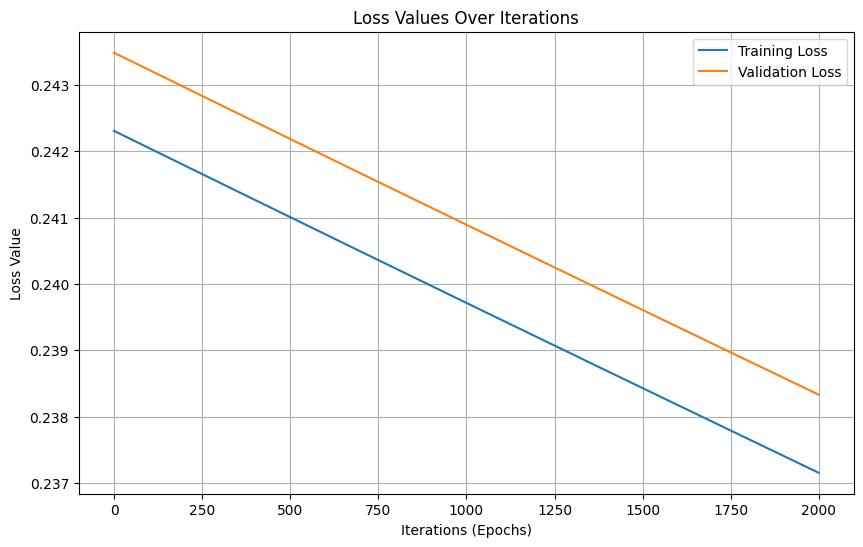

In [86]:
visualise_loss_values(losses)

**Question:**
- Does the loss get smaller over time? In either case, explain the reason behind it.
- For both the regularisation factor and the learning rate, plot the loss with a sample of larger and smaller values for each hyperparameter. Observe how the loss changes for each hyperparameter _individually_ and draw hypotheses justifying these observations.
    - __Note: you do not need to interpret the joint effects of changing the hyperparameter values__

**Answer**
Yes the graph above, shows that the training and testing data decrease steadily with the number of epochs. This suggests that the model is learning and improving for every iteration, this in turn lowers the losses.

However, the validation and always shown to be higher than the training loss, which could suggest overfitting(i.e lower generalisation)



**How the regularisation factor(lambda) affect the training loss.**

For the graph below the code cell, the loss is initially very low, as the regularisation factor increases, the loss steadily increases, this is because in ridge regression, when the lambda value increases, the model penalises the larger coefficients more, hence there is stronger regularisation, this reduces the models ability to closely fit to the training data causing large training loss.



**How the learning rate affects the training loss.**

In the third graph, an extremely small learning rate results in very slow progress in minimising the loss. For higher learning rates the loss reduces effectively, but for very large learning rates, the training loss increases again.

This is because, a very small learning rate causes the optimisation process to converge very slowly. A moderate learning rate ensures quick and effective convergence. However, a very high learning rate may cause the optimiser to go past the the minimum, which would increase the loss.

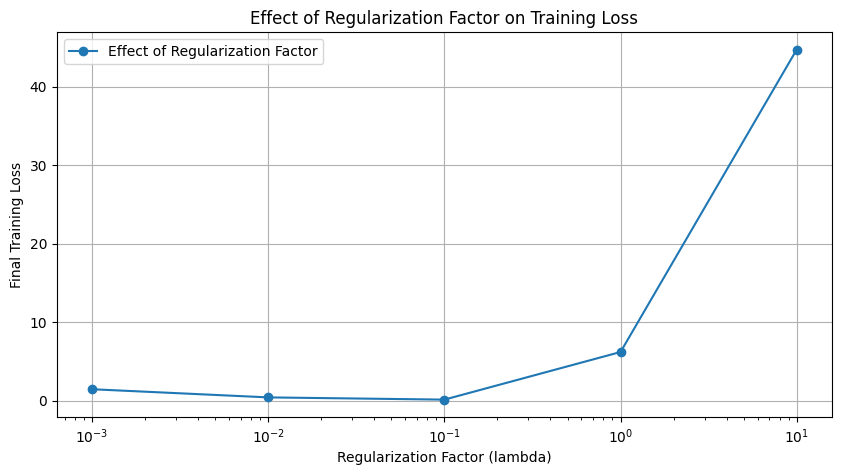

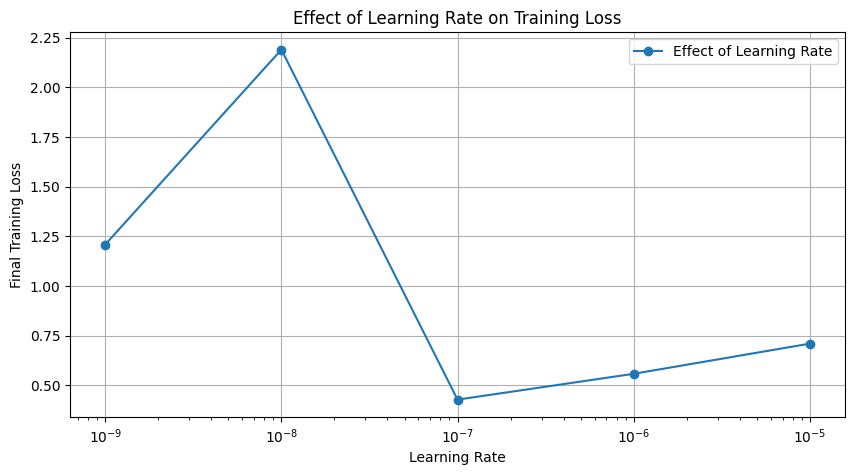

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # Import if splitting is needed in train_entire_model

def plot_hyperparameter_effects(X, y):
    """
    Plot the effect of regularization factor and learning rate on loss using the train_entire_model function.
    """
    # Define common hyperparameters
    n_iterations = 2000  # Number of iterations
    batch_size = 15  # Batch size for training

    # Regularization factor effects
    lambda_values = [0.001, 0.01, 0.1, 1.0, 10]
    learning_rate = 1e-6 # Fixed learning rate for this experiment
    losses_lambda = []

    for lambda_val in lambda_values:
        hyperparams = {
            "n_iterations": n_iterations,
            "learning_rate": learning_rate,
            "lambda": lambda_val,
        }
        # Train the model and get the final loss
        losses = train_entire_model(X, y, hyperparams)
        final_loss = losses["Training"][-1]  # Use the last training loss value
        losses_lambda.append(final_loss)

    plt.figure(figsize=(10, 5))
    plt.plot(lambda_values, losses_lambda, marker='o', label='Effect of Regularization Factor')
    plt.xlabel('Regularization Factor (lambda)')
    plt.ylabel('Final Training Loss')
    plt.xscale('log')
    plt.legend()
    plt.title('Effect of Regularization Factor on Training Loss')
    plt.grid(True)
    plt.show()

    # Learning rate effects
    learning_rates = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    lambda_reg = 0.1  # Fixed regularization factor for this experiment
    losses_lr = []

    for lr in learning_rates:
        hyperparams = {
            "n_iterations": n_iterations,
            "learning_rate": lr,
            "lambda": lambda_reg,
        }
        # Train the model and get the final loss
        losses = train_entire_model(X, y, hyperparams)
        final_loss = losses["Training"][-1]  # Use the last training loss value
        losses_lr.append(final_loss)

    plt.figure(figsize=(10, 5))
    plt.plot(learning_rates, losses_lr, marker='o', label='Effect of Learning Rate')
    plt.xlabel('Learning Rate')
    plt.ylabel('Final Training Loss')
    plt.xscale('log')
    plt.legend()
    plt.title('Effect of Learning Rate on Training Loss')
    plt.grid(True)
    plt.show()

# Example usage
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.rand(100)     # 100 target values
plot_hyperparameter_effects(X, y)


## - End of Coursework -